<a href="https://colab.research.google.com/github/MoreJignesh/British_Airways-Data_Science/blob/main/Data_Extraction_Master_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Extraction : Web scraping from URL

Author: Jignesh more created as on 2nd Jan 2025

- updated dynamic logic to cater change of order in keys while scrapping as on 18th Jan 2025

In [1]:
#Getting Necessary Libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
# Base URL for scraping
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 8
page_size = 100

# # List to store reviews data
# reviews_data = []
master_reviews_data = []
feedback_dictionary = {}
rating_dictionary = {}
fields_dictionary = {}

# Loop over the pages to scrape data
for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    soup = parsed_content

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8


In [3]:
# extracting only ratings the one stored in an icons
def extract_ratings(soup):
    # Use dictionary comprehension to create the ratings dictionary
    ratings = {
        row.find("td", class_="review-rating-header").get_text(strip=True): len(row.find_all("span", class_="star fill"))
        for row in soup.find_all("tr")
        if row.find("td", class_="review-rating-header") and len(row.find_all("span", class_="star fill")) > 0
    }
    return ratings

# def extract_feedback_data(row):
#     # Extract the first matching div with the class "body"
#     div = row.find("div", {"class": "body"})  # Use `find` for a single element

#     if not div:  # Check if no matching element is found
#         return None

#     extracted_data = {
#         "Title": div.find("h2", class_="text_header").get_text(strip=True) if div.find("h2", class_="text_header") else None,
#         "Name": div.find("span", itemprop="name").get_text(strip=True) if div.find("span", itemprop="name") else None,
#         "Date": div.find("time", itemprop="datePublished").get_text(strip=True) if div.find("time", itemprop="datePublished") else None,
#         "Feedback": div.find("div", {"class": "text_content"}).get_text(strip=True) if div.find("div", {"class": "text_content"}) else None,
#     }
#     return extracted_data

# def extract_feedback_data(row):
#     # Find the first "div" with the class "body" in the specified row
#     div = row.find("div", {"class": "body"})  # Use `find` instead of `find_all`

#     if not div:
#         return None  # Return None if no matching div is found

#     # Extract data from the div
#     extracted_data = {
#         "Title": div.find("h2", class_="text_header").get_text(strip=True) if div.find("h2", class_="text_header") else None,
#         "Name": div.find("span", itemprop="name").get_text(strip=True) if div.find("span", itemprop="name") else None,
#         "Date": div.find("time", itemprop="datePublished").get_text(strip=True) if div.find("time", itemprop="datePublished") else None,
#         "Feedback": div.find("div", {"class": "text_content"}).get_text(strip=True) if div.find("div", {"class": "text_content"}) else None,
#     }

#     return extracted_data

#extracting only the stings values of table
def extract_fields(soup, fields):
    # Use dictionary comprehension to create the review_data dictionary
    review_data = {
        field_name: (
            row.find_next_sibling('td', class_='review-value').text.strip()
            if (row := soup.find('td', class_=f'review-rating-header {field_name.lower().replace(" ", "_")}'))
            and (row.find_next_sibling('td', class_='review-value'))
            else "Field not found" if not row
            else "No value found"
        )
        for field_name in fields
    }
    return review_data

# # Scrape data from multiple pages
# def scrape_reviews(base_url, pages, page_size, fields):
#     master_reviews_data = []
#     for i in range(1, pages + 1):
#         print(f"Scraping page {i}...")
#         url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
#         response = requests.get(url)
#         if response.status_code == 200:
#             soup = BeautifulSoup(response.content, 'html.parser')
#             combined_data = combine_results(soup, fields)
#             master_reviews_data.append(combined_data)
#         else:
#             print(f"Failed to fetch data for page {i}, status code: {response.status_code}")
#     return master_reviews_data




In [4]:
# Scrape data from multiple pages
fields = ["aircraft","type_of_traveller","cabin_flown","route","date_flown","recommended"]

# def scrape_reviews(base_url, pages, page_size, fields):
master_reviews_data = []
for i in range(1, pages + 1):
    print(f"Scraping page {i}...")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        # Find all reviews in the current page
        reviews_on_page = soup.find_all("div", {"class": "body"})  # Adjust selector to match the reviews container
        for review in reviews_on_page:
          # if i == 1 and index == 0:
          #   # print(review)
            extracted_data = {
            "Title": review.find("h2", class_="text_header").get_text(strip=True) if review.find("h2", class_="text_header") else None,
            "Name": review.find("span", itemprop="name").get_text(strip=True) if review.find("span", itemprop="name") else None,
            "Date": review.find("time", itemprop="datePublished").get_text(strip=True) if review.find("time", itemprop="datePublished") else None,
            "Feedback": review.find("div", {"class": "text_content"}).get_text(strip=True) if review.find("div", {"class": "text_content"}) else None,
            }

            # print(extracted_data)
            extract_ratings(review)
            rating_data = extract_ratings(review)
            # print(rating_data)
            extract_fields(review, fields)
            fields_data = extract_fields(review, fields)
            # print(fields_data)
            # extract_feedback_data(review)
            # review_data = extract_feedback_data(review)
            # print(review_data)
            # fields_data = extract_fields(review, fields)
            review_data = extracted_data
            review_data.update(fields_data)
            review_data.update(rating_data)
            master_reviews_data.append(review_data)

print(master_reviews_data)
#                 review_data = extract_feedback_data(review)
#                 master_reviews_data.append(review_data)
#                 print(master_reviews_data)
#         else:
#             print(f"Failed to fetch data for page {i}, status code: {response.status_code}")

#     print(f"Scraped {len(master_reviews_data)} reviews from {pages} pages.")
#     return master_reviews_data

# print(f"Scraped {len(master_reviews_data)} reviews from {pages} pages.")
# # Main Execution
# if __name__ == "__main__":
#     reviews_data = scrape_reviews(base_url, pages, page_size, fields)
#     for review in reviews_data:
#         print(review)

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
[{'Title': '“food has really gone downhill”', 'Name': 'John Prescott', 'Date': '14th February 2025', 'Feedback': '✅Trip Verified| First the good news, the club suites are such a huge improvement over the old business seats I hope I never see one again. The not so good news I’m afraid to say was the flight itself. The food has really gone downhill since my last flight, presumably this is a cost cutting measure. If other airlines can offer a really decent quality meal why can’t an airline of BA’s stature? I’ve always thought that a good crew can make up for all the shortcomings but not this time. The crew member looking after me could not have been more bored and was obviously just going through the motions. They couldn’t even be bothered to say cheerio, and I’m not sure I would have answered if they did. Here’s hoping my return is a more

In [5]:
# performing final testing on few records
for index,record in enumerate(master_reviews_data):
  if i <= 15 and index <= 15:
    print(record)

{'Title': '“food has really gone downhill”', 'Name': 'John Prescott', 'Date': '14th February 2025', 'Feedback': '✅Trip Verified| First the good news, the club suites are such a huge improvement over the old business seats I hope I never see one again. The not so good news I’m afraid to say was the flight itself. The food has really gone downhill since my last flight, presumably this is a cost cutting measure. If other airlines can offer a really decent quality meal why can’t an airline of BA’s stature? I’ve always thought that a good crew can make up for all the shortcomings but not this time. The crew member looking after me could not have been more bored and was obviously just going through the motions. They couldn’t even be bothered to say cheerio, and I’m not sure I would have answered if they did. Here’s hoping my return is a more satisfying experience.', 'aircraft': 'A350-1000', 'type_of_traveller': 'Couple Leisure', 'cabin_flown': 'Business Class', 'route': 'London to Nairobi', 

## Noticed that the order of data extraction can be inconsistent, and may vary at times during web scraping, depending on the availability of the information.

##Storing the File in CSV

In [6]:
import csv

all_keys = set()
for record in master_reviews_data:
    all_keys.update(record.keys())

# Initialize a counter for records saved
record_count = 0

# Step 2: Open the CSV file and write data dynamically
with open('reviews.csv', mode='w', newline='', encoding='utf-8') as file:
    # Create a CSV DictWriter
    writer = csv.DictWriter(file, fieldnames=sorted(all_keys))  # Sorted to ensure consistent column order
    writer.writeheader()  # Write the header row

    # Step 3: Write the records
    for record in master_reviews_data:
        # Ensure that all fields exist in each record, filling in missing fields with empty strings
        row = {key: record.get(key, '') for key in all_keys}
        writer.writerow(row)
        record_count += 1  # Increment the counter

# Output the total records saved
print(f"Total records saved: {record_count}")

Total records saved: 800


## Reading the csv file stored in Data Extraction & understanding the Data

In [8]:
# # Read CSV with error handling
Feedback_Data = pd.read_csv('reviews.csv')

df_data = pd.DataFrame(Feedback_Data)
df_data.head()

Cabin Staff Service                Date  \
0                  1.0  14th February 2025   
1                  5.0  14th February 2025   
2                  2.0   7th February 2025   
3                  5.0   1st February 2025   
4                  4.0   20th January 2025   

                                            Feedback  Food & Beverages  \
0  ✅Trip Verified| First the good news, the club ...               2.0   
1  ✅Trip Verified|   I have never travelled with ...               5.0   
2  ✅Trip Verified| Terrible overall, medium servi...               1.0   
3  ✅Trip Verified|   London Heathrow to Male In n...               4.0   
4  Not Verified|  Very good flight following an e...               4.0   

   Ground Service  Inflight Entertainment           Name  Seat Comfort  \
0             3.0                     NaN  John Prescott           4.0   
1             5.0                     4.0       A Hashin           4.0   
2             1.0                     1.0       L Martin           2.0   
3             5.0                     5.0       Paul Lee           5.0   
4             4.0                     NaN     Guy Senior           3.0   

                              Title  Value For Money  Wifi & Connectivity  \
0   “food has really gone downhill”                3                  NaN   
1  "thoroughly enjoyed this flight"                5                  NaN   
2   “customer support was terrible”                1                  NaN   
3   "a really enjoyable experience"                4                  NaN   
4                "Very good flight"                4                  NaN   

          aircraft     cabin_flown     date_flown recommended  \
0        A350-1000  Business Class  February 2025          no   
1             A380   Economy Class  February 2025         yes   
2  Field not found   Economy Class  December 2024          no   
3       Boeing 777  Business Class   January 2025         yes   
4             A320  Business Class   January 2025         yes   

                       route type_of_traveller  
0          London to Nairobi    Couple Leisure  
1   Dubai to London Heathrow      Solo Leisure  
2           Zürich to London    Couple Leisure  
3             London to Male    Couple Leisure  
4  London Heathrow to Zurich      Solo Leisure

In [9]:
df_data = df_data.reset_index()
df_data.head()

index  Cabin Staff Service                Date  \
0      0                  1.0  14th February 2025   
1      1                  5.0  14th February 2025   
2      2                  2.0   7th February 2025   
3      3                  5.0   1st February 2025   
4      4                  4.0   20th January 2025   

                                            Feedback  Food & Beverages  \
0  ✅Trip Verified| First the good news, the club ...               2.0   
1  ✅Trip Verified|   I have never travelled with ...               5.0   
2  ✅Trip Verified| Terrible overall, medium servi...               1.0   
3  ✅Trip Verified|   London Heathrow to Male In n...               4.0   
4  Not Verified|  Very good flight following an e...               4.0   

   Ground Service  Inflight Entertainment           Name  Seat Comfort  \
0             3.0                     NaN  John Prescott           4.0   
1             5.0                     4.0       A Hashin           4.0   
2             1.0                     1.0       L Martin           2.0   
3             5.0                     5.0       Paul Lee           5.0   
4             4.0                     NaN     Guy Senior           3.0   

                              Title  Value For Money  Wifi & Connectivity  \
0   “food has really gone downhill”                3                  NaN   
1  "thoroughly enjoyed this flight"                5                  NaN   
2   “customer support was terrible”                1                  NaN   
3   "a really enjoyable experience"                4                  NaN   
4                "Very good flight"                4                  NaN   

          aircraft     cabin_flown     date_flown recommended  \
0        A350-1000  Business Class  February 2025          no   
1             A380   Economy Class  February 2025         yes   
2  Field not found   Economy Class  December 2024          no   
3       Boeing 777  Business Class   January 2025         yes   
4             A320  Business Class   January 2025         yes   

                       route type_of_traveller  
0          London to Nairobi    Couple Leisure  
1   Dubai to London Heathrow      Solo Leisure  
2           Zürich to London    Couple Leisure  
3             London to Male    Couple Leisure  
4  London Heathrow to Zurich      Solo Leisure

## Will Perform Data Cleansing

In [10]:
#creating New columns based on 'date_flown' by spliting them
df_data['date_flown'] = pd.to_datetime(df_data['date_flown'])
df_data['year'] = df_data['date_flown'].dt.year
df_data['month'] = df_data['date_flown'].dt.month


<ipython-input-10-961d1496f9ea>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_data['date_flown'] = pd.to_datetime(df_data['date_flown'])


In [11]:
#Based on this we will be droping all the records before 2022
df_data = df_data[(df_data['year'] >= 2022) & (df_data['year'] <= 2024)]
df_data['year'].value_counts().sort_index()

year
2022    217
2023    278
2024    168
Name: count, dtype: int64

In [12]:
#will try to split Feedback column into 2 (Verified and Feedback from |)
df_data[['Verified', 'Feedback']] = df_data['Feedback'].str.split('|', expand=True)


<ipython-input-12-29ecd175e0d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data[['Verified', 'Feedback']] = df_data['Feedback'].str.split('|', expand=True)


In [13]:
#will try to get number of words in feedback and store in in new column
df_data['word_count'] = df_data['Feedback'].apply(lambda x: len(str(x).split()))

<ipython-input-13-828aff0d3073>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['word_count'] = df_data['Feedback'].apply(lambda x: len(str(x).split()))


In [14]:
df_data.tail()

index  Cabin Staff Service               Date  \
672    672                  2.0  12th January 2022   
673    673                  5.0  10th January 2022   
674    674                  2.0   9th January 2022   
675    675                  1.0   9th January 2022   
676    676                  4.0   9th January 2022   

                                              Feedback  Food & Beverages  \
672    Return trip Cape Town to Durban in Club Clas...               3.0   
673    I used British Airways for the first time an...               5.0   
674    I recently had the unfortunate privilege of ...               1.0   
675    I have flown with BA for many years and toda...               2.0   
676    The entertainment selection was sub par, min...               1.0   

     Ground Service  Inflight Entertainment         Name  Seat Comfort  \
672             4.0                     NaN    Ken Howie           3.0   
673             5.0                     NaN  Sonto Mtolo           5.0   
674             1.0                     3.0  G Thanidhar           4.0   
675             1.0                     3.0      C Heale           1.0   
676             1.0                     1.0     S Bartan           1.0   

                                        Title  ...         aircraft  \
672           "return trip was disappointing"  ...   Boeing 737-800   
673        "staff was very kind and friendly"  ...  Field not found   
674  "complete disregard for your passengers"  ...  Field not found   
675          "decline into a sub-par service"  ...  Field not found   
676              "very basic generic airline"  ...  Field not found   

        cabin_flown date_flown recommended                            route  \
672  Business Class 2022-01-01         yes              Cape Town to Durban   
673   Economy Class 2022-01-01         yes              Durban to Cape Town   
674  Business Class 2022-01-01          no  Bangalore to Detroit via London   
675   Economy Class 2022-01-01          no               New York to London   
676   Economy Class 2022-01-01          no              Las Vegas to London   

    type_of_traveller  year month        Verified  word_count  
672    Couple Leisure  2022     1  ✅Trip Verified         288  
673      Solo Leisure  2022     1  ✅Trip Verified         226  
674      Solo Leisure  2022     1  ✅Trip Verified         249  
675          Business  2022     1  ✅Trip Verified         260  
676          Business  2022     1  ✅Trip Verified          55  

[5 rows x 22 columns]

In [15]:
df_data.describe()

index  Cabin Staff Service  Food & Beverages  Ground Service  \
count  663.000000           608.000000        530.000000      636.000000   
mean   338.633484             2.963816          2.471698        2.311321   
min      2.000000             1.000000          1.000000        1.000000   
25%    172.500000             1.000000          1.000000        1.000000   
50%    338.000000             3.000000          2.000000        2.000000   
75%    503.500000             4.000000          4.000000        4.000000   
max    676.000000             5.000000          5.000000        5.000000   
std    192.503345             1.513913          1.439436        1.472241   

       Inflight Entertainment  Seat Comfort  Value For Money  \
count              357.000000    616.000000       663.000000   
mean                 2.635854      2.595779         2.152338   
min                  1.000000      1.000000         1.000000   
25%                  1.000000      1.000000         1.000000   
50%                  3.000000      3.000000         2.000000   
75%                  4.000000      4.000000         3.000000   
max                  5.000000      5.000000         5.000000   
std                  1.426732      1.353315         1.380493   

       Wifi & Connectivity                     date_flown         year  \
count           238.000000                            663   663.000000   
mean              2.121849  2023-05-16 15:53:29.049773824  2022.926094   
min               1.000000            2022-01-01 00:00:00  2022.000000   
25%               1.000000            2022-10-01 00:00:00  2022.000000   
50%               1.000000            2023-06-01 00:00:00  2023.000000   
75%               3.000000            2024-01-01 00:00:00  2024.000000   
max               5.000000            2024-12-01 00:00:00  2024.000000   
std               1.431217                            NaN     0.759013   

            month  word_count  
count  663.000000  663.000000  
mean     6.369532  163.571644  
min      1.000000   23.000000  
25%      3.000000   80.000000  
50%      6.000000  130.000000  
75%      9.000000  213.000000  
max     12.000000  639.000000  
std      3.325827  117.254560

In [16]:
df_data.dtypes

index                              int64
Cabin Staff Service              float64
Date                              object
Feedback                          object
Food & Beverages                 float64
Ground Service                   float64
Inflight Entertainment           float64
Name                              object
Seat Comfort                     float64
Title                             object
Value For Money                    int64
Wifi & Connectivity              float64
aircraft                          object
cabin_flown                       object
date_flown                datetime64[ns]
recommended                       object
route                             object
type_of_traveller                 object
year                               int32
month                              int32
Verified                          object
word_count                         int64
dtype: object

In [17]:
#Understanding only 'object' data
df_data[df_data.dtypes[df_data.dtypes == 'object'].index]

Date                                           Feedback  \
2    7th February 2025   Terrible overall, medium service and the flig...   
6    15th January 2025     I booked through BA because Loganair don’t ...   
7     9th January 2025     British airways lost bags in LHR then found...   
9     4th January 2025     We flew in November 2023, but it took this ...   
11    1st January 2025     After an excellent flight on a 777 CPT to L...   
..                 ...                                                ...   
672  12th January 2022    Return trip Cape Town to Durban in Club Clas...   
673  10th January 2022    I used British Airways for the first time an...   
674   9th January 2022    I recently had the unfortunate privilege of ...   
675   9th January 2022    I have flown with BA for many years and toda...   
676   9th January 2022    The entertainment selection was sub par, min...   

                 Name                                         Title  \
2            L Martin               “customer support was terrible”   
6             R Layne  "70 days chasing BA’s complaints department"   
7    Michael Chastain                  "BA refused to reimburse me"   
9            G Marton             "BA forced us to buy new tickets"   
11           J Meares                        "the seat is outdated"   
..                ...                                           ...   
672         Ken Howie               "return trip was disappointing"   
673       Sonto Mtolo            "staff was very kind and friendly"   
674       G Thanidhar      "complete disregard for your passengers"   
675           C Heale              "decline into a sub-par service"   
676          S Bartan                  "very basic generic airline"   

            aircraft      cabin_flown recommended  \
2    Field not found    Economy Class          no   
6    Field not found    Economy Class          no   
7    Field not found  Premium Economy          no   
9    Field not found    Economy Class          no   
11              A380   Business Class         yes   
..               ...              ...         ...   
672   Boeing 737-800   Business Class         yes   
673  Field not found    Economy Class         yes   
674  Field not found   Business Class          no   
675  Field not found    Economy Class          no   
676  Field not found    Economy Class          no   

                                    route type_of_traveller        Verified  
2                        Zürich to London    Couple Leisure  ✅Trip Verified  
6               Manchester to Isle of Man      Solo Leisure  ✅Trip Verified  
7           Houston to cologne via London    Family Leisure  ✅Trip Verified  
9                       London to Phoenix    Family Leisure  ✅Trip Verified  
11   London to Cape Town via Johannesburg      Solo Leisure  ✅Trip Verified  
..                                    ...               ...             ...  
672                   Cape Town to Durban    Couple Leisure  ✅Trip Verified  
673                   Durban to Cape Town      Solo Leisure  ✅Trip Verified  
674       Bangalore to Detroit via London      Solo Leisure  ✅Trip Verified  
675                    New York to London          Business  ✅Trip Verified  
676                   Las Vegas to London          Business  ✅Trip Verified  

[663 rows x 10 columns]

In [18]:
#quick stats of string datatypes
df_data[df_data.dtypes[df_data.dtypes == 'object'].index].describe()

Date                                           Feedback  \
count                  663                                                663   
unique                 473                                                663   
top     4th September 2023   Terrible overall, medium service and the flig...   
freq                     4                                                  1   

           Name                        Title         aircraft    cabin_flown  \
count       663                          663              663            663   
unique      574                          655               60              4   
top     E Smyth  "Terrible customer service"  Field not found  Economy Class   
freq         13                            2              325            367   

       recommended                route type_of_traveller        Verified  
count          663                  663               663             663  
unique           2                  474                 5               3  
top             no  Vancouver to London    Couple Leisure  ✅Trip Verified  
freq           483                    8               234             477

In [19]:
#convert verified & recommended to Numerics
df_data['recommended'] = df_data['recommended'].replace({'yes': 1, 'no': 0})
df_data['recommended'].value_counts()

<ipython-input-19-6d299d9d3810>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data['recommended'] = df_data['recommended'].replace({'yes': 1, 'no': 0})


recommended
0    483
1    180
Name: count, dtype: int64

In [20]:
df_data['cabin_flown'].unique()

array(['Economy Class', 'Premium Economy', 'Business Class',
       'First Class'], dtype=object)

In [21]:
df_data['cabin_flown'] = df_data['cabin_flown'].replace({'First Class': 1, 'Business Class': 2,'Premium Economy': 3, 'Economy Class': 4 , 'NA_Null': 5})
df_data['cabin_flown'].value_counts()

<ipython-input-21-2d46804a5bd0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data['cabin_flown'] = df_data['cabin_flown'].replace({'First Class': 1, 'Business Class': 2,'Premium Economy': 3, 'Economy Class': 4 , 'NA_Null': 5})


cabin_flown
4    367
2    227
3     57
1     12
Name: count, dtype: int64

In [22]:
df_data['type_of_traveller'].unique()

array(['Couple Leisure', 'Solo Leisure', 'Family Leisure', 'Business',
       'Field not found'], dtype=object)

In [23]:
#convert verified & recommended to Numerics
df_data['type_of_traveller'] = df_data['type_of_traveller'].replace({'Solo Leisure': 1, 'Couple Leisure': 2,'Business': 3, 'Family Leisure': 4, 'Field not found': 5})
df_data['type_of_traveller'].value_counts()

<ipython-input-23-eb5332f1595e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data['type_of_traveller'] = df_data['type_of_traveller'].replace({'Solo Leisure': 1, 'Couple Leisure': 2,'Business': 3, 'Family Leisure': 4, 'Field not found': 5})


type_of_traveller
2    234
1    211
4    109
3    107
5      2
Name: count, dtype: int64

In [24]:
df_data['Verified'].unique()

array(['✅Trip Verified', 'Not Verified', 'cNot Verified'], dtype=object)

In [25]:
df_data['Verified'].value_counts()

Verified
✅Trip Verified    477
Not Verified      185
cNot Verified       1
Name: count, dtype: int64

In [26]:
#will update the Verified Column and update cNot Verified	as Not Verified
df_data['Verified'] = df_data['Verified'].replace({'Not Verified': 'Not Verified', 'cNot Verified': 'Not Verified'})
df_data['Verified'] = df_data['Verified'].replace({'✅Trip Verified': 'Verified'})
df_data['Verified'].value_counts()


Verified
Verified        477
Not Verified    186
Name: count, dtype: int64

In [27]:
df_data['Verified'] = df_data['Verified'].replace({'Verified': 1, 'Not Verified': 0})
df_data['Verified'].value_counts()

<ipython-input-27-0c55140ef0d0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data['Verified'] = df_data['Verified'].replace({'Verified': 1, 'Not Verified': 0})


Verified
1    477
0    186
Name: count, dtype: int64

In [28]:
df_data['recommended'].value_counts()

recommended
0    483
1    180
Name: count, dtype: int64

In [29]:
#checking records available for each cabin_flown
df_data['cabin_flown'].value_counts()

cabin_flown
4    367
2    227
3     57
1     12
Name: count, dtype: int64

In [30]:
#checking records available for each type_of_traveller
df_data['type_of_traveller'].value_counts()


type_of_traveller
2    234
1    211
4    109
3    107
5      2
Name: count, dtype: int64

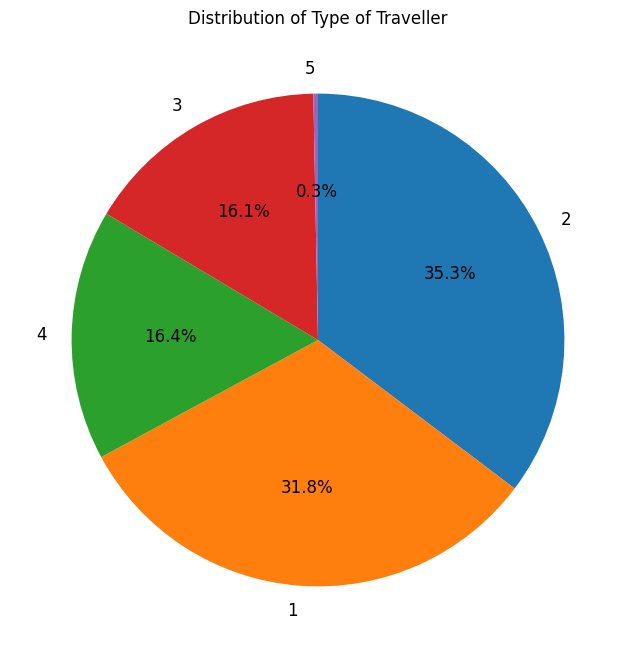

In [31]:
# Count occurrences and sort
traveller_counts = df_data['type_of_traveller'].value_counts().sort_values(ascending=False)

# Plot pie chart with values
plt.figure(figsize=(8, 8))
traveller_counts.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False, textprops={'fontsize': 12})

plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Type of Traveller')
plt.show()

### As you can see, Couple Leisure are our top traveller followed by Solo Leisure
>'Solo Leisure': 1, 'Couple Leisure': 2,'Business': 3, 'Family Leisure': 4, 'Field not found': 5

In [32]:
#Pivorting type of traveller Vs cabin flown
df_data.pivot_table(index='type_of_traveller', columns='cabin_flown', aggfunc='size')

cabin_flown          1     2     3      4
type_of_traveller                        
1                  7.0  59.0  22.0  123.0
2                  4.0  83.0  22.0  125.0
3                  1.0  58.0   3.0   45.0
4                  NaN  26.0  10.0   73.0
5                  NaN   1.0   NaN    1.0

### Feature Engineering

In [33]:
#checking which columns have NA
df_data.isna().sum().sort_values(ascending=False)

Wifi & Connectivity       425
Inflight Entertainment    306
Food & Beverages          133
Cabin Staff Service        55
Seat Comfort               47
Ground Service             27
date_flown                  0
Verified                    0
month                       0
year                        0
type_of_traveller           0
route                       0
recommended                 0
index                       0
cabin_flown                 0
aircraft                    0
Value For Money             0
Title                       0
Name                        0
Feedback                    0
Date                        0
word_count                  0
dtype: int64

<Axes: >

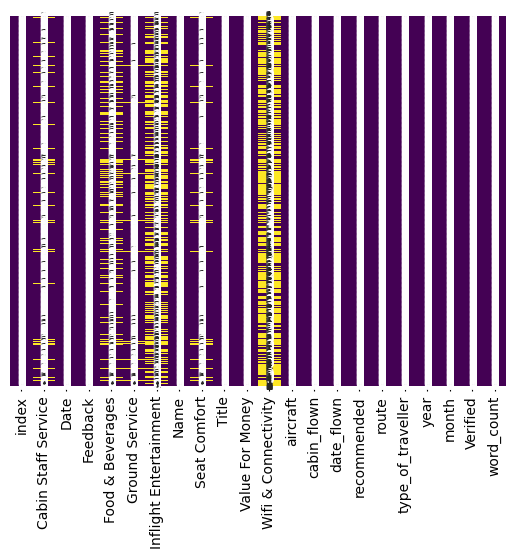

In [34]:
#Visualising the invalid values using heatmap

missing_values = ["N/a","na",np.nan]
sns.heatmap(df_data.isnull(),yticklabels=False,cbar=False,cmap='viridis',annot=True)

As you can see on above chart, needs to fix missing values to complete the data cleasing process : I will perform mentioned method on each column

 - Wifi & Connectivity - Interpolation Method
 - Inflight Entertainment - Interpolation Method
 - Food & Beverages - Interpolation Method
 - Cabin Staff Service - Interpolation Method
 - Seat Comfort - Interpolation Method
 - Ground Service - Interpolation Method

In [35]:
# #filling with interpolation
df_data['Wifi & Connectivity'] = df_data['Wifi & Connectivity'].interpolate(method='linear').round(0)
df_data['Inflight Entertainment'] = df_data['Inflight Entertainment'].interpolate(method='linear').round(0)
df_data['Food & Beverages'] = df_data['Food & Beverages'].interpolate(method='linear').round(0)
df_data['Cabin Staff Service'] = df_data['Cabin Staff Service'].interpolate(method='linear').round(0)
df_data['Seat Comfort'] = df_data['Seat Comfort'].interpolate(method='linear').round(0)
df_data['Ground Service'] = df_data['Ground Service'].interpolate(method='linear').round(0)



In [36]:
#checking seat comfort data and will fill the rating for missing values
df_data['Seat Comfort'].value_counts().sort_index()

Seat Comfort
1.0    189
2.0    133
3.0    162
4.0    112
5.0     67
Name: count, dtype: int64

In [37]:
#checking seat comfort data and will fill the rating for missing values
df_data['Ground Service'].value_counts().sort_index()

Ground Service
1.0    312
2.0     81
3.0     96
4.0     99
5.0     75
Name: count, dtype: int64

In [38]:
#checking seat comfort data and will fill the rating for missing values
df_data['Cabin Staff Service'].value_counts().sort_index()

Cabin Staff Service
1.0    164
2.0    101
3.0    133
4.0    121
5.0    144
Name: count, dtype: int64

In [39]:
#checking which columns have NA
df_data.isna().sum().sort_values(ascending=False)

Wifi & Connectivity       7
Cabin Staff Service       0
Verified                  0
month                     0
year                      0
type_of_traveller         0
route                     0
recommended               0
date_flown                0
cabin_flown               0
aircraft                  0
index                     0
Value For Money           0
Title                     0
Seat Comfort              0
Name                      0
Inflight Entertainment    0
Ground Service            0
Food & Beverages          0
Feedback                  0
Date                      0
word_count                0
dtype: int64

In [40]:
df_data['Inflight Entertainment'] = df_data['Inflight Entertainment'].interpolate(method='linear', limit_direction='both').round(0)
df_data['Wifi & Connectivity'] = df_data['Wifi & Connectivity'].interpolate(method='linear', limit_direction='both').round(0)
df_data['Seat Comfort'] = df_data['Seat Comfort'].interpolate(method='linear', limit_direction='both').round(0)
df_data['Food & Beverages'] = df_data['Food & Beverages'].interpolate(method='linear', limit_direction='both').round(0)
df_data['Cabin Staff Service'] = df_data['Cabin Staff Service'].interpolate(method='linear', limit_direction='both').round(0)
df_data['Ground Service'] = df_data['Ground Service'].interpolate(method='linear', limit_direction='both').round(0)



In [41]:
#checking which columns have NA
df_data.isna().sum().sort_values(ascending=False)

index                     0
Cabin Staff Service       0
Verified                  0
month                     0
year                      0
type_of_traveller         0
route                     0
recommended               0
date_flown                0
cabin_flown               0
aircraft                  0
Wifi & Connectivity       0
Value For Money           0
Title                     0
Seat Comfort              0
Name                      0
Inflight Entertainment    0
Ground Service            0
Food & Beverages          0
Feedback                  0
Date                      0
word_count                0
dtype: int64

<Axes: >

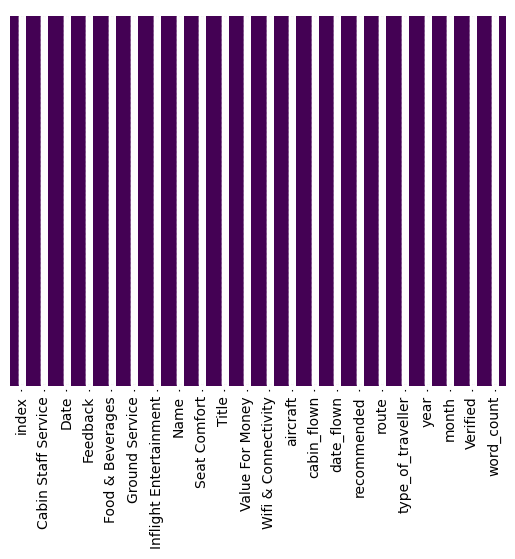

In [42]:
#Visualising the invalid values using heatmap

# missing_values = ["N/a","na",np.nan]
sns.heatmap(df_data.isnull(),yticklabels=False,cbar=False,cmap='viridis',annot=True)

#Lets start Data Analysis

In [43]:
df_data.head()

index  Cabin Staff Service               Date  \
2       2                  2.0  7th February 2025   
6       6                  2.0  15th January 2025   
7       7                  1.0   9th January 2025   
9       9                  2.0   4th January 2025   
11     11                  4.0   1st January 2025   

                                             Feedback  Food & Beverages  \
2    Terrible overall, medium service and the flig...               1.0   
6      I booked through BA because Loganair don’t ...               1.0   
7      British airways lost bags in LHR then found...               2.0   
9      We flew in November 2023, but it took this ...               2.0   
11     After an excellent flight on a 777 CPT to L...               4.0   

    Ground Service  Inflight Entertainment              Name  Seat Comfort  \
2              1.0                     1.0          L Martin           2.0   
6              1.0                     1.0           R Layne           2.0   
7              1.0                     2.0  Michael Chastain           1.0   
9              1.0                     2.0          G Marton           2.0   
11             3.0                     1.0          J Meares           3.0   

                                           Title  ...         aircraft  \
2                “customer support was terrible”  ...  Field not found   
6   "70 days chasing BA’s complaints department"  ...  Field not found   
7                   "BA refused to reimburse me"  ...  Field not found   
9              "BA forced us to buy new tickets"  ...  Field not found   
11                        "the seat is outdated"  ...             A380   

    cabin_flown date_flown  recommended                                 route  \
2             4 2024-12-01            0                      Zürich to London   
6             4 2024-11-01            0             Manchester to Isle of Man   
7             3 2024-12-01            0         Houston to cologne via London   
9             4 2023-11-01            0                     London to Phoenix   
11            2 2024-12-01            1  London to Cape Town via Johannesburg   

    type_of_traveller  year  month  Verified  word_count  
2                   2  2024     12         1          36  
6                   1  2024     11         1         102  
7                   4  2024     12         1         109  
9                   4  2023     11         1          70  
11                  1  2024     12         1         433  

[5 rows x 22 columns]

In [44]:
#checking how many review we got each year
df_data['year'].value_counts().sort_index()

year
2022    217
2023    278
2024    168
Name: count, dtype: int64

In [45]:
#how to show it in percentage df_data['year'].value_counts().sort_index() with 2 decimal values
df_data['year'].value_counts(normalize=True).sort_index().round(2)

year
2022    0.33
2023    0.42
2024    0.25
Name: proportion, dtype: float64


 >>Based on this we can say we have got 40% less Feedback Reviews for Year 2024, compared to 2023

 >>So we may need to analyse based on % change in each services, and how had affect in 2024

Value counts for Cabin Staff Service:
Cabin Staff Service  1.0  2.0  3.0  4.0  5.0
year                                        
2022                  46   40   33   46   52
2023                  72   39   64   45   58
2024                  46   22   36   30   34




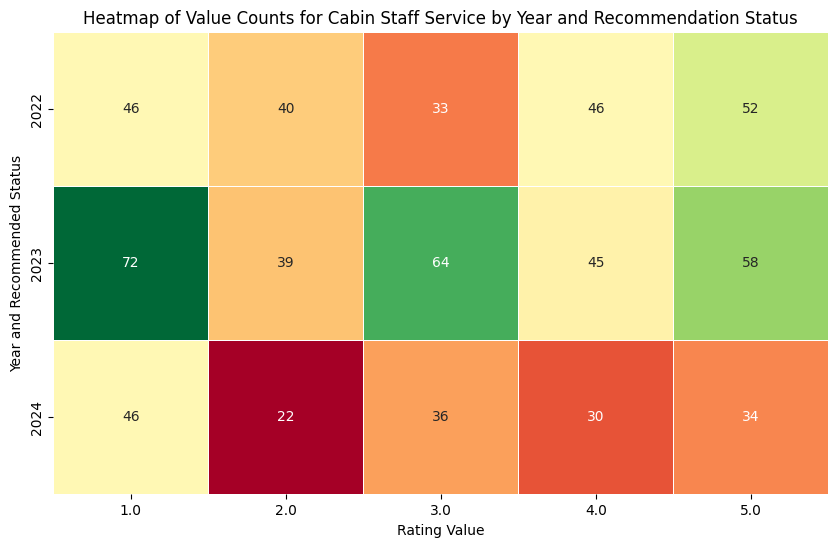

Value counts for Food & Beverages:
Food & Beverages  1.0  2.0  3.0  4.0  5.0
year                                     
2022               72   48   33   35   29
2023               98   59   59   37   25
2024               52   31   41   24   20




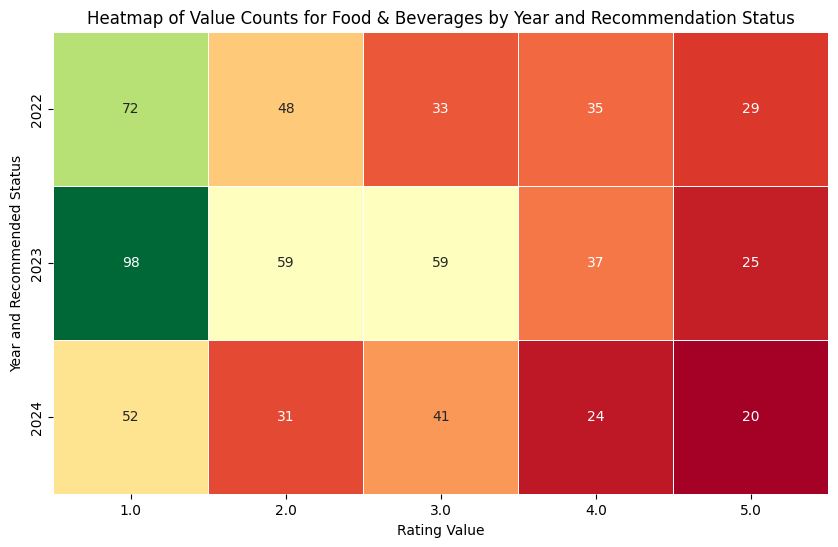

Value counts for Ground Service:
Ground Service  1.0  2.0  3.0  4.0  5.0
year                                   
2022             89   30   38   34   26
2023            139   30   34   42   33
2024             84   21   24   23   16




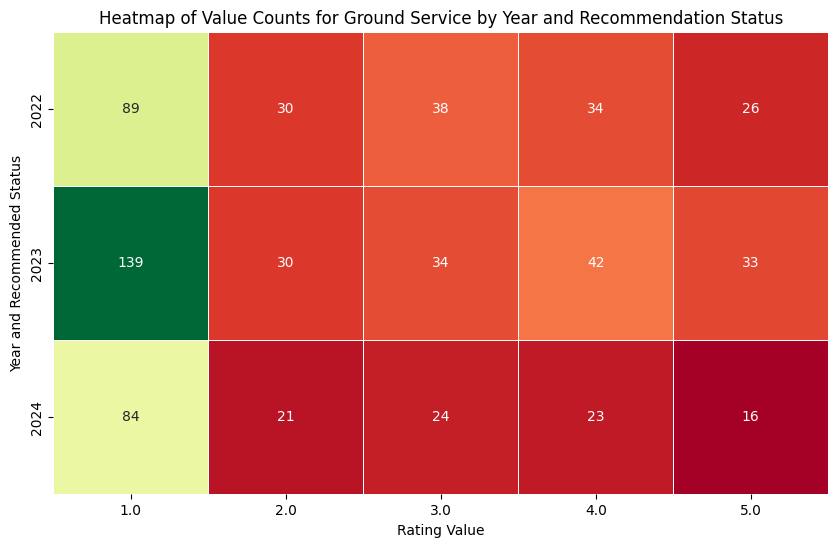

Value counts for Inflight Entertainment:
Inflight Entertainment  1.0  2.0  3.0  4.0  5.0
year                                           
2022                     42   60   44   48   23
2023                     76   65   72   43   22
2024                     32   50   40   31   15




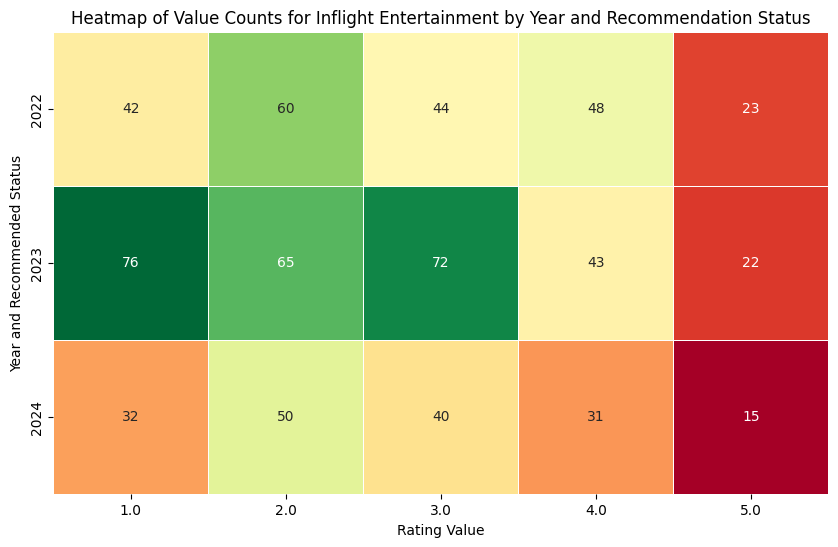

Value counts for Seat Comfort:
Seat Comfort  1.0  2.0  3.0  4.0  5.0
year                                 
2022           47   48   53   43   26
2023           95   48   70   43   22
2024           47   37   39   26   19




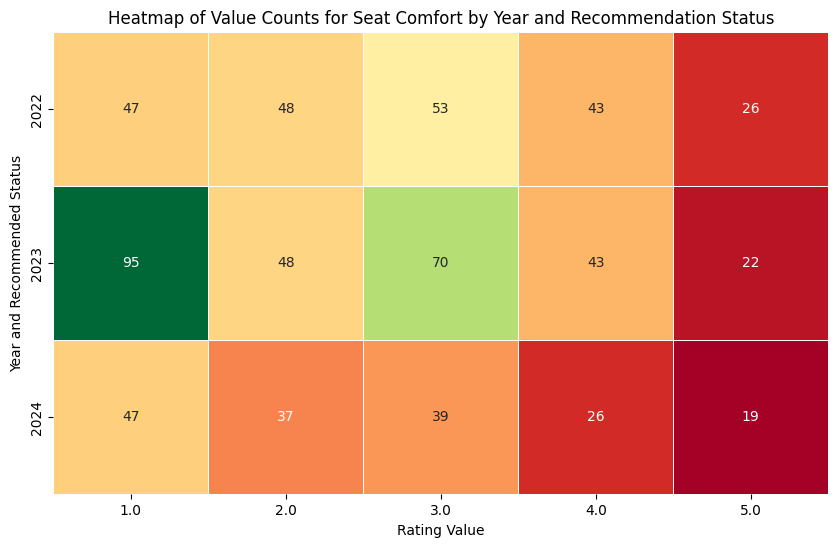

Value counts for Value For Money:
Value For Money    1   2   3   4   5
year                                
2022             100  28  38  30  21
2023             151  43  28  30  26
2024              80  28  26  23  11




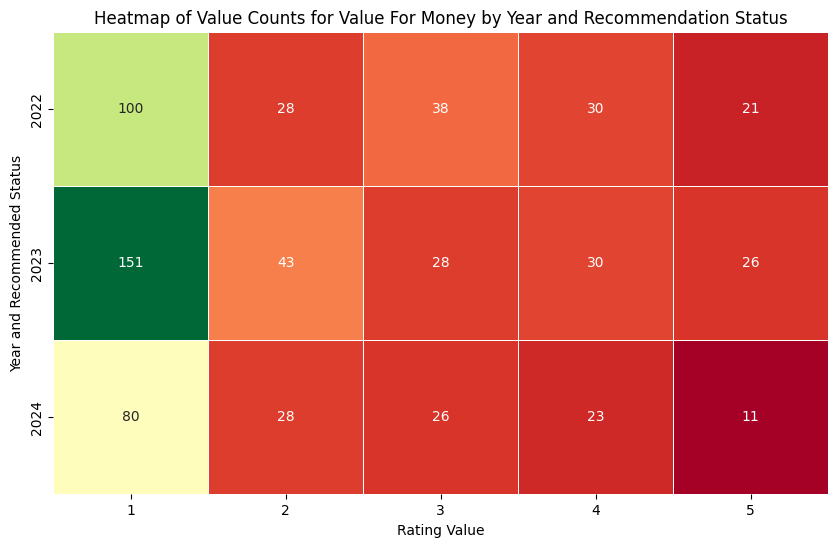

Value counts for Wifi & Connectivity:
Wifi & Connectivity  1.0  2.0  3.0  4.0  5.0
year                                        
2022                  78   43   27   30   39
2023                 140   64   35   27   12
2024                  60   54   27   26    1




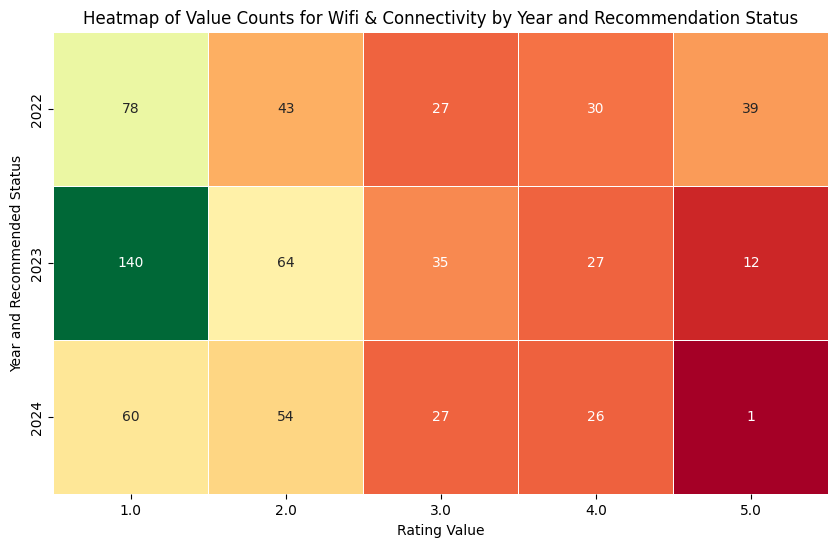

Value counts for cabin_flown:
cabin_flown  1   2   3    4
year                       
2022         2  85  22  108
2023         6  86  20  166
2024         4  56  15   93




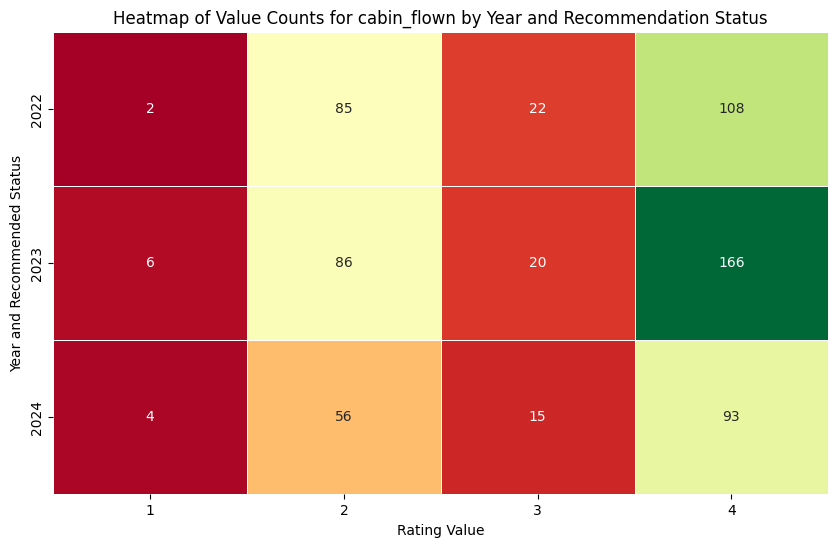

In [46]:
columns_to_analyze = [
    "Cabin Staff Service", "Food & Beverages", "Ground Service",
    "Inflight Entertainment", "Seat Comfort", "Value For Money", "Wifi & Connectivity" ,"cabin_flown"
]

# Loop through each column and display the value counts grouped by year
for column in columns_to_analyze:
    print(f"Value counts for {column}:")
    value_counts = df_data.groupby(['year'])[column].value_counts().unstack(fill_value=0)
    print(value_counts)
    print("\n")

    # Create a heatmap for the value counts
    plt.figure(figsize=(10, 6))
    sns.heatmap(value_counts, annot=True, cmap="RdYlGn", fmt="d", linewidths=0.5, cbar=False)
    plt.title(f'Heatmap of Value Counts for {column} by Year and Recommendation Status')
    plt.xlabel('Rating Value')
    plt.ylabel('Year and Recommended Status')
    plt.show()

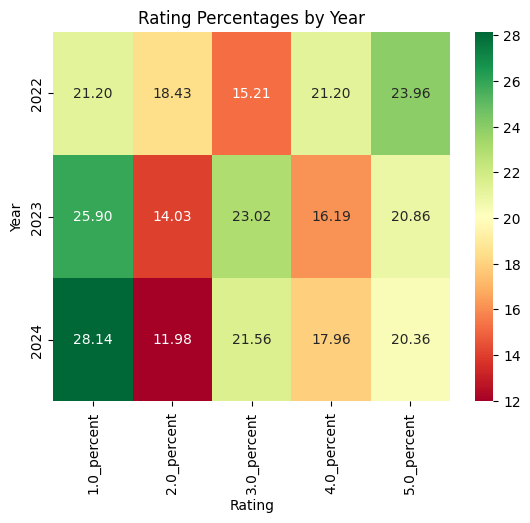

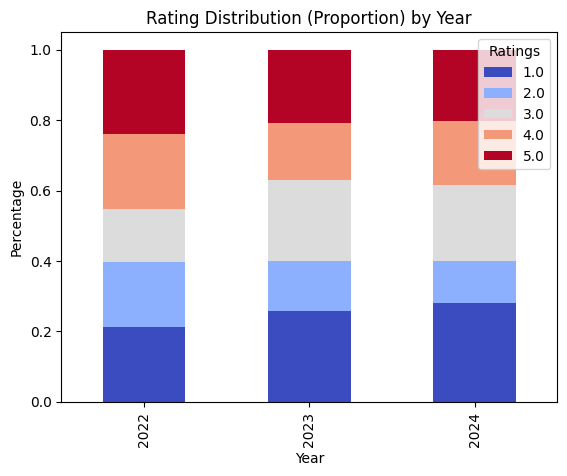

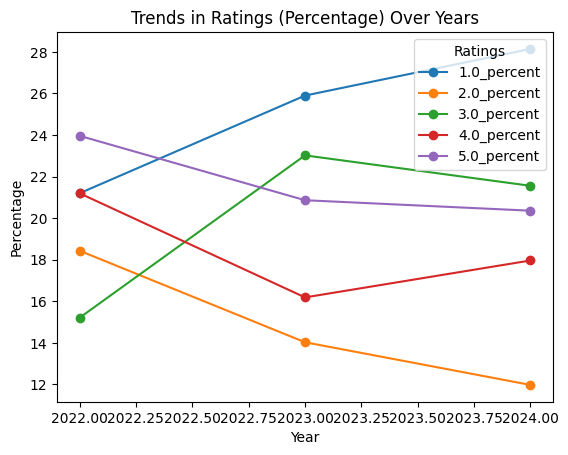

In [47]:
# # Above charts are still so confusion and not providing us any clear picture on whats happening in the data
# # We will do Sample Data Testing and see new interesting charts
# data = {
#     'year': [2022, 2023, 2024],
#     '1.0': [46, 72, 47],
#     '2.0': [40, 39, 20],
#     '3.0': [33, 64, 36],
#     '4.0': [46, 45, 30],
#     '5.0': [52, 58, 34],
#     'total_reviews': [217, 278, 167]
# }
# df = pd.DataFrame(data).set_index('year')

# # Calculate percentages
# rating_columns = ['1.0', '2.0', '3.0', '4.0', '5.0']
# for col in rating_columns:
#     df[f'{col}_percent'] = (df[col] / df['total_reviews']) * 100

# # Heatmap
# sns.heatmap(df[[f'{col}_percent' for col in rating_columns]], annot=True, cmap='RdYlGn', fmt=".2f")
# plt.title('Rating Percentages by Year')
# plt.ylabel('Year')
# plt.xlabel('Rating')
# plt.show()

# # Stacked Bar Chart
# df[rating_columns].div(df['total_reviews'], axis=0).plot(kind='bar', stacked=True, colormap='coolwarm')
# plt.title('Rating Distribution (Proportion) by Year')
# plt.ylabel('Percentage')
# plt.xlabel('Year')
# plt.legend(title='Ratings')
# plt.show()

# # Line Chart
# df[[f'{col}_percent' for col in rating_columns]].plot(marker='o')
# plt.title('Trends in Ratings (Percentage) Over Years')
# plt.ylabel('Percentage')
# plt.xlabel('Year')
# plt.legend(title='Ratings')
# plt.show()

Final Data:

Data for Cabin Staff Service:
{'year': [2022, 2023, 2024], '1.0': [46, 72, 46], '2.0': [40, 39, 22], '3.0': [33, 64, 36], '4.0': [46, 45, 30], '5.0': [52, 58, 34], 'total_reviews': [217, 278, 168]}


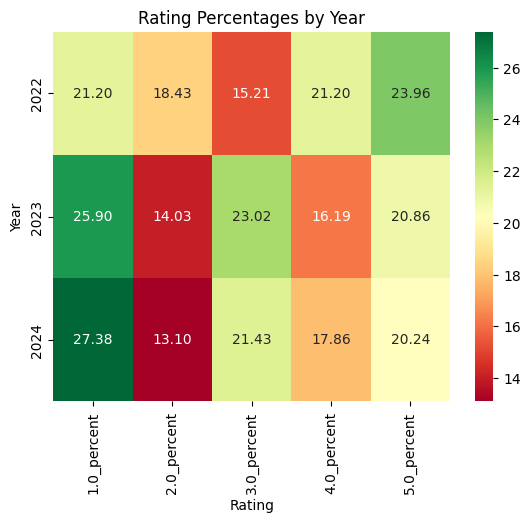

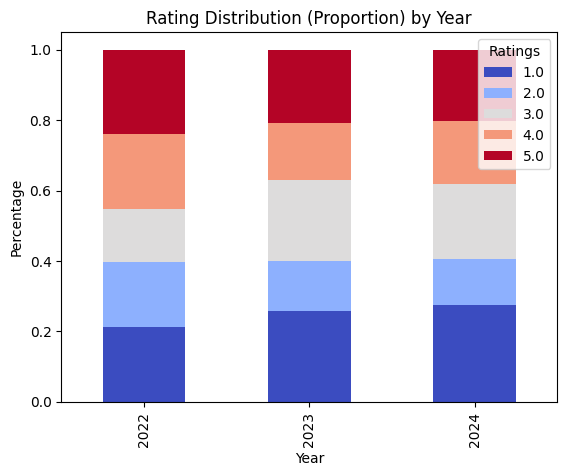

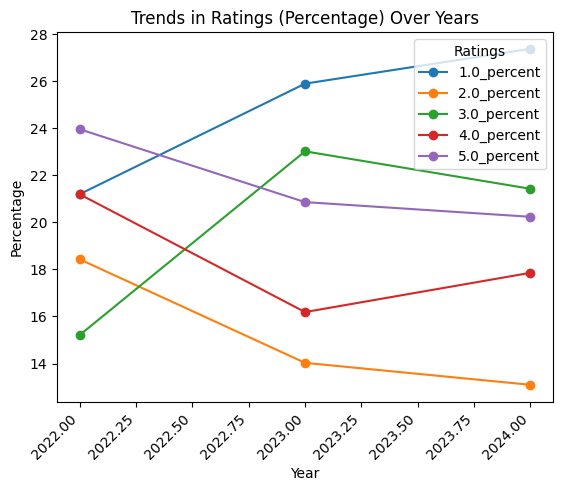


Data for Food & Beverages:
{'year': [2022, 2023, 2024], '1.0': [72, 98, 52], '2.0': [48, 59, 31], '3.0': [33, 59, 41], '4.0': [35, 37, 24], '5.0': [29, 25, 20], 'total_reviews': [217, 278, 168]}


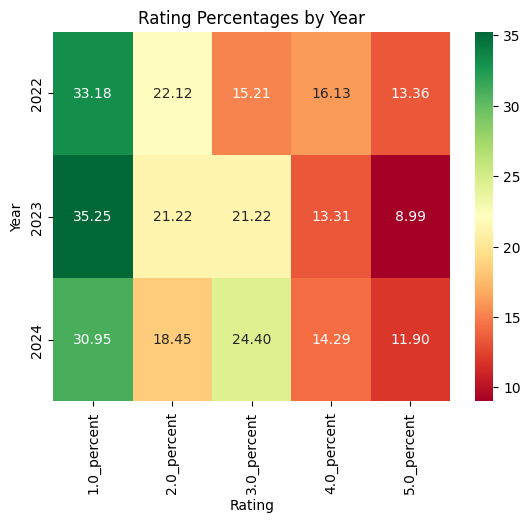

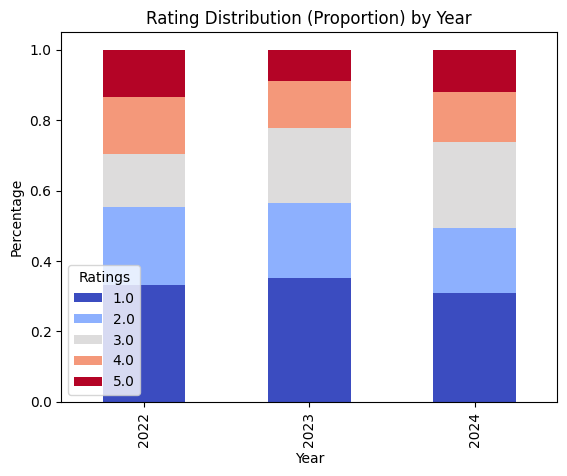

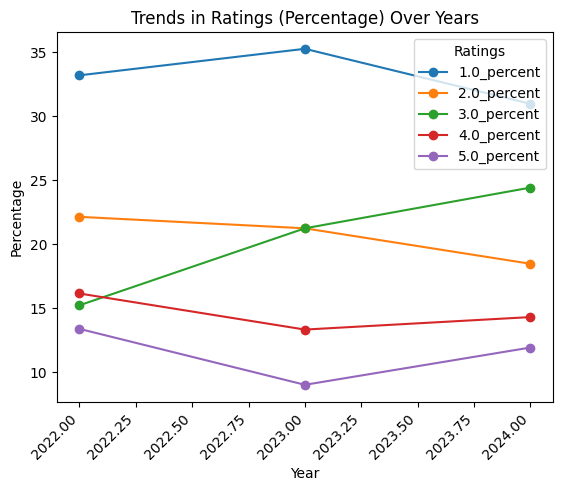


Data for Ground Service:
{'year': [2022, 2023, 2024], '1.0': [89, 139, 84], '2.0': [30, 30, 21], '3.0': [38, 34, 24], '4.0': [34, 42, 23], '5.0': [26, 33, 16], 'total_reviews': [217, 278, 168]}


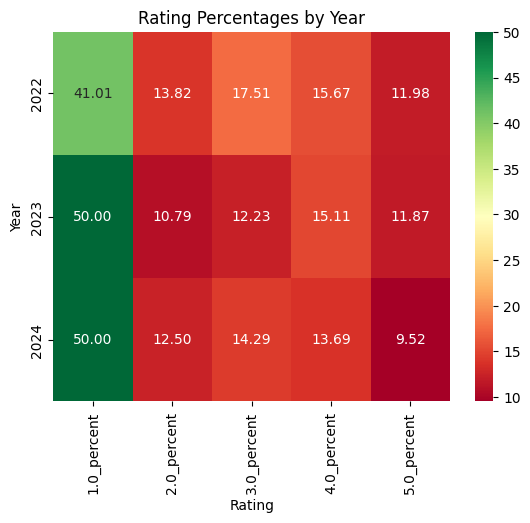

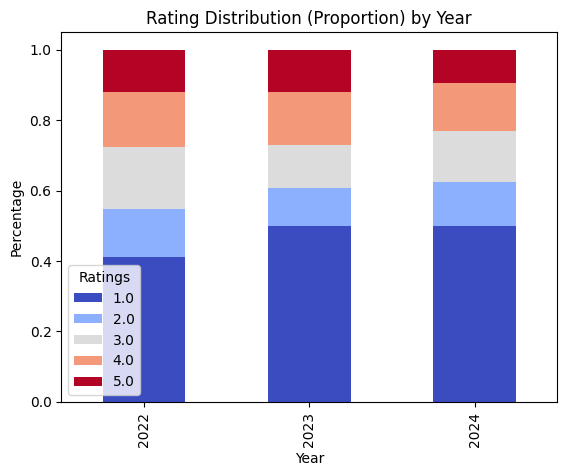

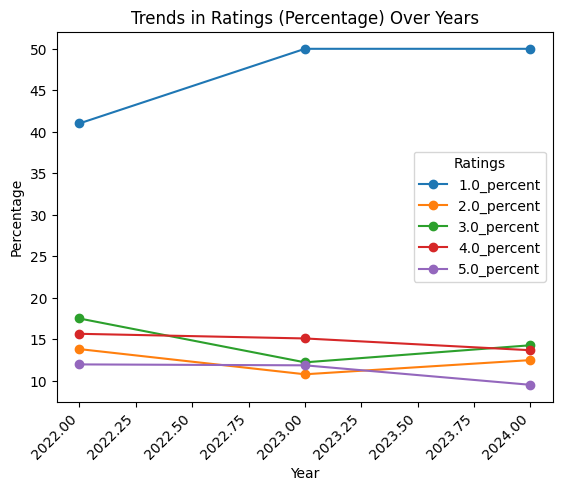


Data for Inflight Entertainment:
{'year': [2022, 2023, 2024], '1.0': [42, 76, 32], '2.0': [60, 65, 50], '3.0': [44, 72, 40], '4.0': [48, 43, 31], '5.0': [23, 22, 15], 'total_reviews': [217, 278, 168]}


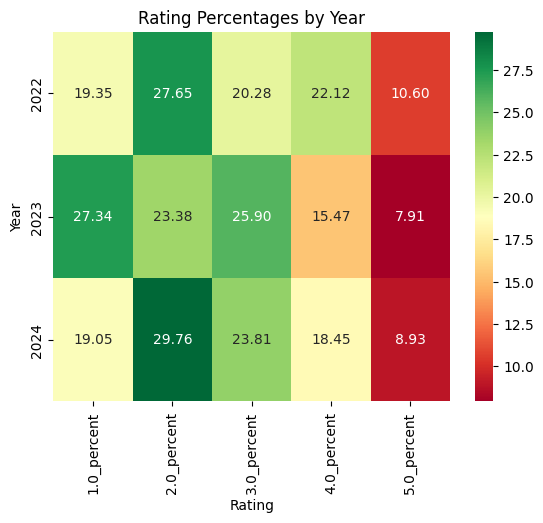

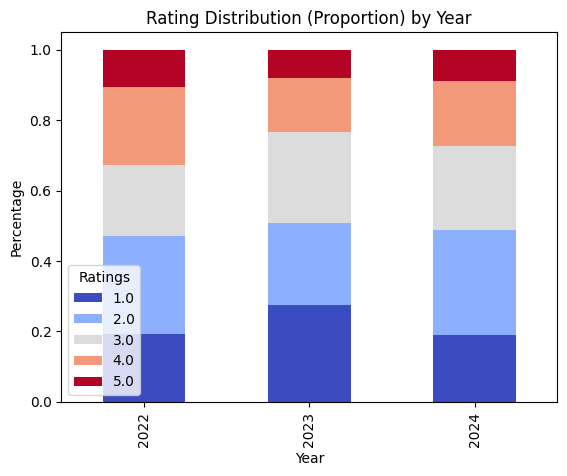

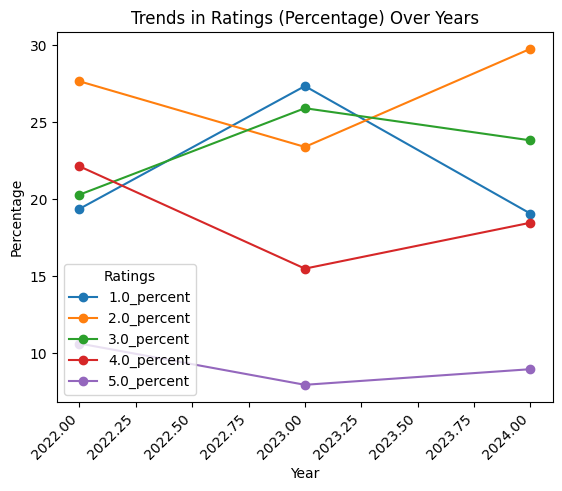


Data for Seat Comfort:
{'year': [2022, 2023, 2024], '1.0': [47, 95, 47], '2.0': [48, 48, 37], '3.0': [53, 70, 39], '4.0': [43, 43, 26], '5.0': [26, 22, 19], 'total_reviews': [217, 278, 168]}


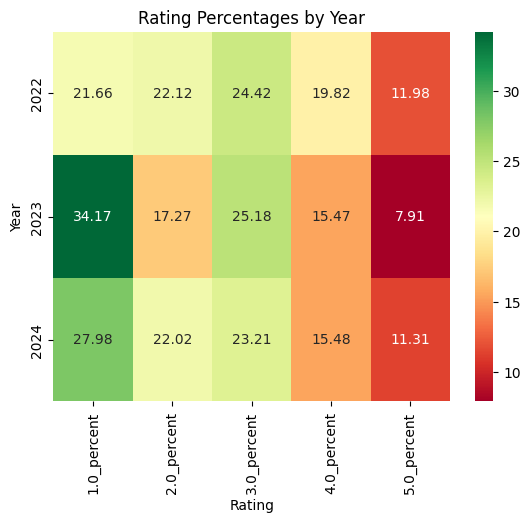

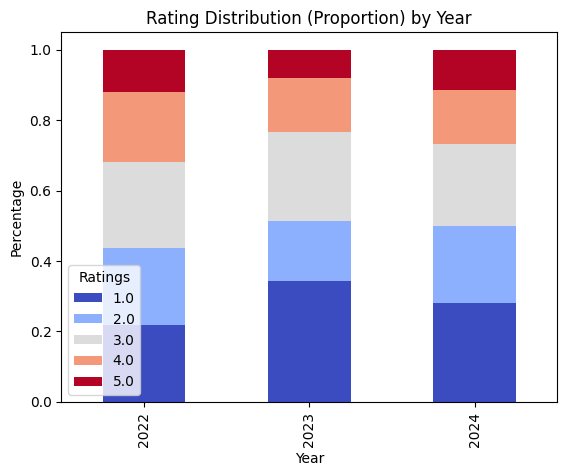

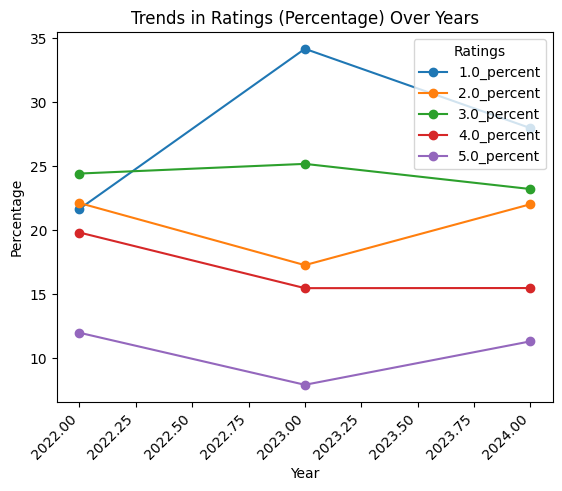


Data for Value For Money:
{'year': [2022, 2023, 2024], '1.0': [100, 151, 80], '2.0': [28, 43, 28], '3.0': [38, 28, 26], '4.0': [30, 30, 23], '5.0': [21, 26, 11], 'total_reviews': [217, 278, 168]}


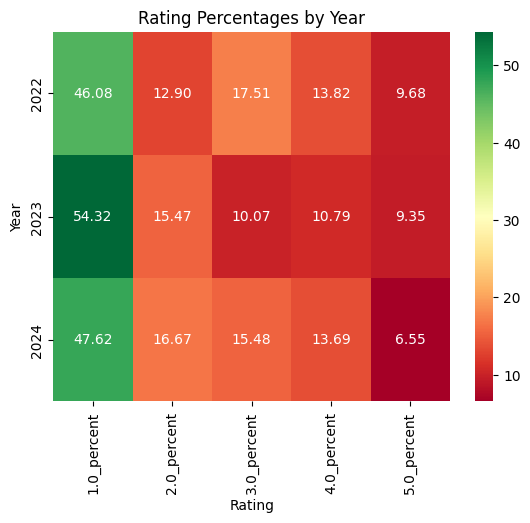

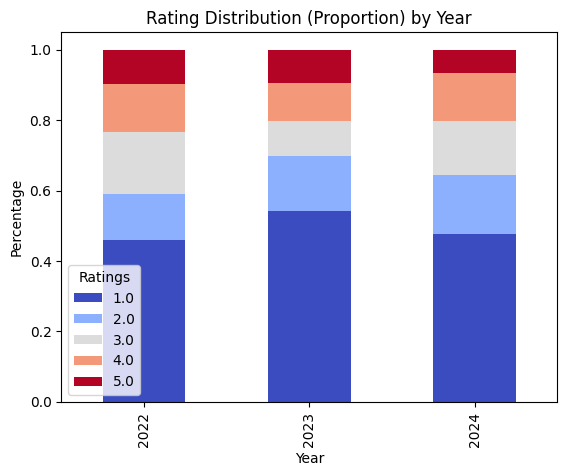

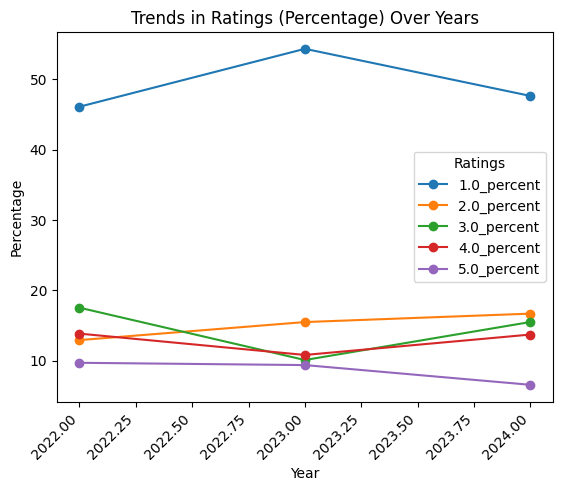


Data for Wifi & Connectivity:
{'year': [2022, 2023, 2024], '1.0': [78, 140, 60], '2.0': [43, 64, 54], '3.0': [27, 35, 27], '4.0': [30, 27, 26], '5.0': [39, 12, 1], 'total_reviews': [217, 278, 168]}


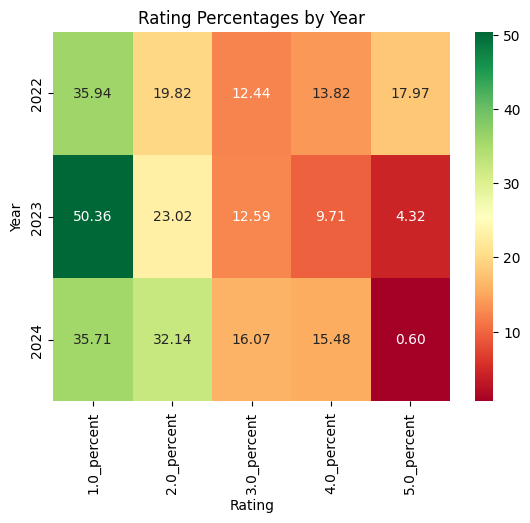

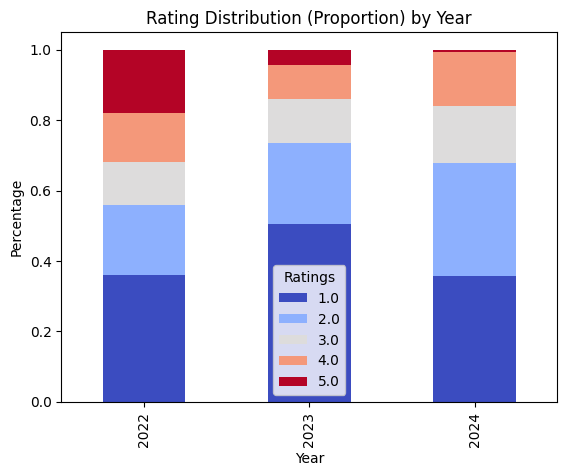

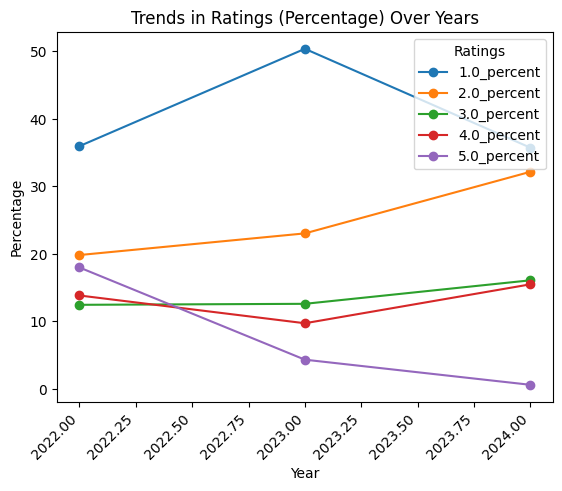


Data for cabin_flown:
{'year': [2022, 2023, 2024], '1.0': [2, 6, 4], '2.0': [85, 86, 56], '3.0': [22, 20, 15], '4.0': [108, 166, 93], '5.0': [0, 0, 0], 'total_reviews': [217, 278, 168]}


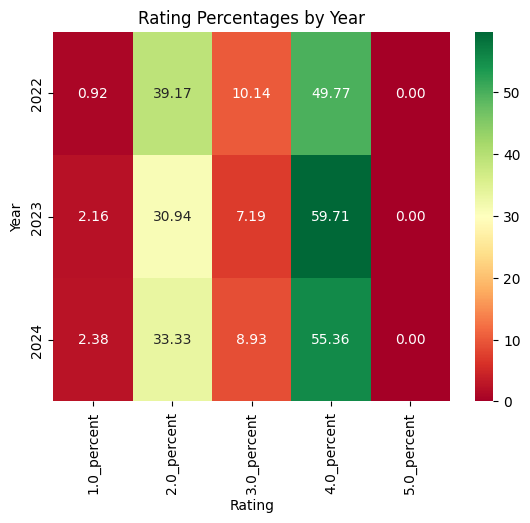

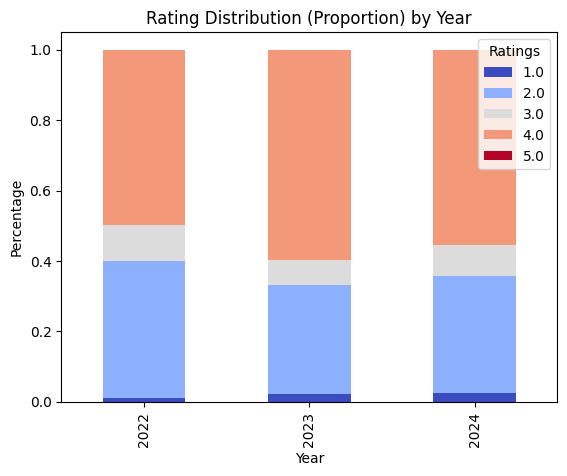

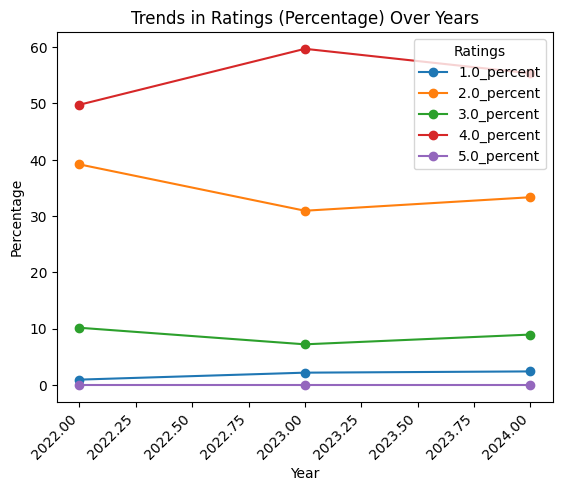

In [48]:
# # Above charts are good and helps us to get clear picture on whats happening in the data, lets make data for it
final_data = {}

#will got it ready will make a new version and visualize it on Charts
for column in columns_to_analyze:
    # Group by year and count the values for the current column
    value_counts = df_data.groupby('year')[column].value_counts().unstack(fill_value=0)

    # Ensure all possible rating values (1.0 to 5.0) are included
    value_counts = value_counts.reindex(columns=[1.0, 2.0, 3.0, 4.0, 5.0], fill_value=0)

    # Add total reviews (sum of all ratings for each year)
    value_counts['total_reviews'] = value_counts.sum(axis=1)

    # Convert the value counts DataFrame to a dictionary format
    data_dict = {
        'year': value_counts.index.tolist(),
        '1.0': value_counts[1.0].tolist(),
        '2.0': value_counts[2.0].tolist(),
        '3.0': value_counts[3.0].tolist(),
        '4.0': value_counts[4.0].tolist(),
        '5.0': value_counts[5.0].tolist(),
        'total_reviews': value_counts['total_reviews'].tolist(),
    }
        # Store the dictionary in the final_data dictionary
    final_data[column] = data_dict

# Output the final_data dictionary
print("Final Data:")
for column, data in final_data.items():

    # Adding title with the column name
    plt.title(f"Data for {column}", fontsize=16, fontweight='bold')
    print(f"\nData for {column}:")
    print(data)

    df = pd.DataFrame(data).set_index('year')

    # Calculate percentages
    rating_columns = ['1.0', '2.0', '3.0', '4.0', '5.0']
    for col in rating_columns:
        df[f'{col}_percent'] = (df[col] / df['total_reviews']) * 100

    # Heatmap
    sns.heatmap(df[[f'{col}_percent' for col in rating_columns]], annot=True, cmap='RdYlGn', fmt=".2f")
    plt.title('Rating Percentages by Year')
    plt.ylabel('Year')
    plt.xlabel('Rating')
    plt.show()

    # Stacked Bar Chart
    df[rating_columns].div(df['total_reviews'], axis=0).plot(kind='bar', stacked=True, colormap='coolwarm')
    plt.title('Rating Distribution (Proportion) by Year')
    plt.ylabel('Percentage')
    plt.xlabel('Year')
    plt.legend(title='Ratings')
    plt.show()

    # Line Chart
    df[[f'{col}_percent' for col in rating_columns]].plot(marker='o')
    plt.title('Trends in Ratings (Percentage) Over Years')
    plt.ylabel('Percentage')
    plt.xlabel('Year')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Ratings')
    plt.show()

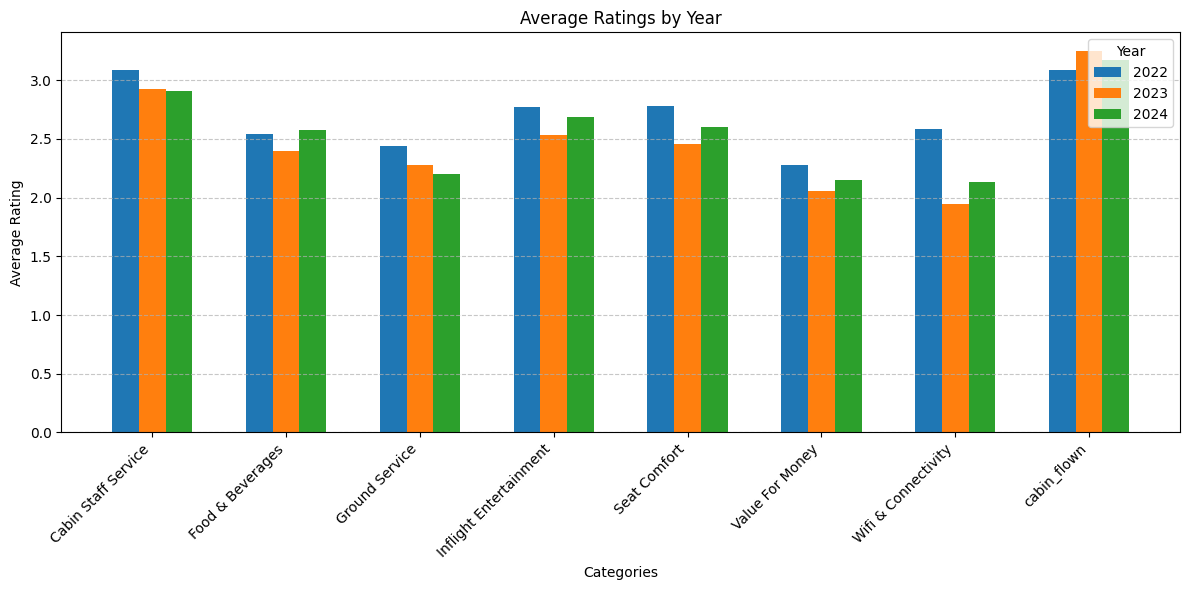

In [49]:
# df_data['cabin_flown'] = df_data['cabin_flown'].replace({'First Class': 1, 'Business Class': 2,'Premium Economy': 3, 'Economy Class': 4 , 'NA': 5})
# df_data['cabin_flown'].value_counts()

# Cross confirming with other charts
# Group by year and calculate mean ratings for each column
avg_ratings = df_data.groupby('year')[columns_to_analyze].mean()

# Set up bar chart parameters
years = avg_ratings.index.tolist()
x = np.arange(len(columns_to_analyze))  # The label locations
width = 0.2  # The width of the bars

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each year
for i, year in enumerate(years):
    ax.bar(
        x + i * width, avg_ratings.loc[year], width, label=f"{year}"
    )

# Add labels and titles
ax.set_xlabel("Categories")
ax.set_ylabel("Average Rating")
ax.set_title("Average Ratings by Year")
ax.set_xticks(x + width)
ax.set_xticklabels(columns_to_analyze, rotation=45, ha="right")
ax.legend(title="Year")

# Show grid and plot
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


>>An in-depth analysis of the data reveals a decline in ratings for Cabin Staff Service in 2024 compared to 2023, suggesting a potential drop in service quality that warrants further investigation. In contrast, Food & Beverages ratings demonstrated an upward trend, reflecting improved customer satisfaction in this area. However, Ground Service remains a significant challenge, consistently receiving low ratings, including notable feedback at the lowest score of 1 out of 5.


>>Encouragingly, marginal improvements were observed in the ratings for Inflight Entertainment and Seat Comfort, signaling progress in these areas. The Value for Money rating also increased in 2024 relative to 2023, although opportunities for further enhancements remain. Notably, Wifi & Connectivity, which faced substantial issues in 2023, experienced the most significant improvement, reflecting effective measures to address past concerns.

>>There has been a slight shift in passenger preferences, with more people moving from Economy Class to other classes. This shift could potentially explain the slight improvement in ratings

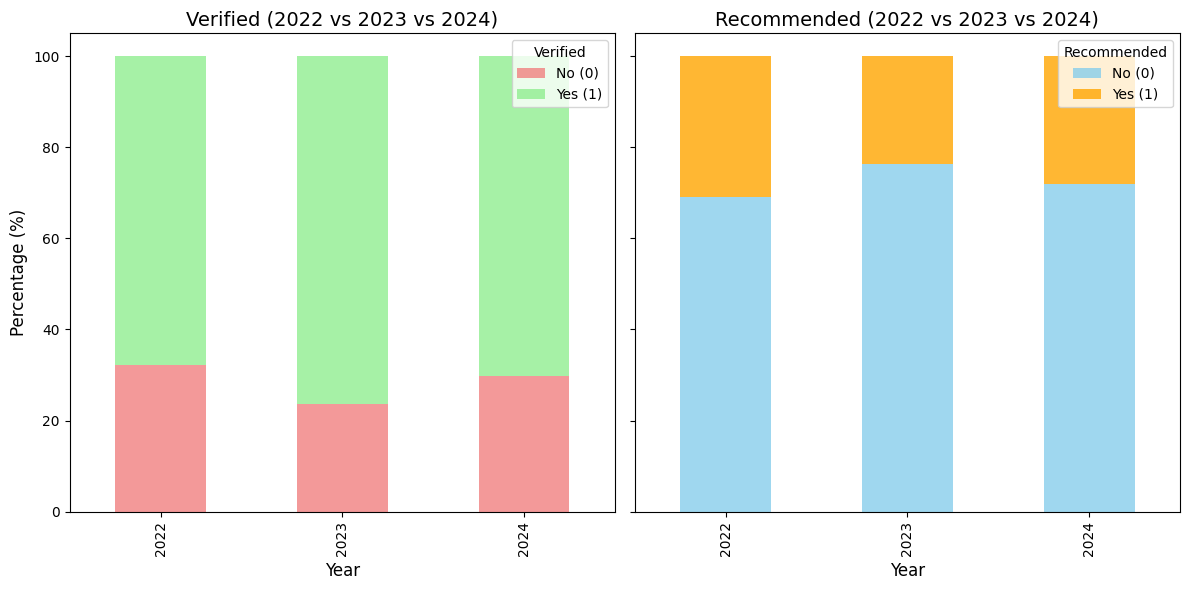

In [50]:
#Trying to get the same data for Binary values of Verified and Recommended
# Step 1: Calculate value counts by year
verified_counts = df_data.groupby(['year'])['Verified'].value_counts(normalize=True).unstack(fill_value=0) * 100
recommended_counts = df_data.groupby(['year'])['recommended'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Step 2: Plot Verified Data (100% Stacked Bar Chart)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

verified_counts.plot(kind='bar', stacked=True, ax=axes[0], color=['lightcoral', 'lightgreen'], alpha=0.8)
axes[0].set_title('Verified (2022 vs 2023 vs 2024)', fontsize=14)
axes[0].set_ylabel('Percentage (%)', fontsize=12)

axes[0].set_xlabel('Year', fontsize=12)
axes[0].legend(title='Verified', labels=['No (0)', 'Yes (1)'])

# Step 3: Plot Recommended Data (100% Stacked Bar Chart)
recommended_counts.plot(kind='bar', stacked=True, ax=axes[1], color=['skyblue', 'orange'], alpha=0.8)
axes[1].set_title('Recommended (2022 vs 2023 vs 2024)', fontsize=14)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].legend(title='Recommended', labels=['No (0)', 'Yes (1)'])

# Final Adjustments
plt.tight_layout()
plt.show()

>>Although the feedback count in 2024 is lower, there was a slight increase in the number of non-verified users compared to the previous year. Additionally, the recommendation count saw a modest rise compared to 2023.

>>A decline in all ratings might indicate reduced passenger volume, a change in the survey process, or degraded service quality.



Recommendation in 2025:
 - Ensure that the decline in service quality is reversed.
 - Focus on areas receiving moderate satisfaction (ratings of 3 and 4).
 - Increase survey participation to gather meaningful data.
 - Improve services for higher satisfaction and consistent ratings.

In [51]:
#Understanding only 'object' data
df_data[df_data.dtypes[df_data.dtypes == 'object'].index]

Date                                           Feedback  \
2    7th February 2025   Terrible overall, medium service and the flig...   
6    15th January 2025     I booked through BA because Loganair don’t ...   
7     9th January 2025     British airways lost bags in LHR then found...   
9     4th January 2025     We flew in November 2023, but it took this ...   
11    1st January 2025     After an excellent flight on a 777 CPT to L...   
..                 ...                                                ...   
672  12th January 2022    Return trip Cape Town to Durban in Club Clas...   
673  10th January 2022    I used British Airways for the first time an...   
674   9th January 2022    I recently had the unfortunate privilege of ...   
675   9th January 2022    I have flown with BA for many years and toda...   
676   9th January 2022    The entertainment selection was sub par, min...   

                 Name                                         Title  \
2            L Martin               “customer support was terrible”   
6             R Layne  "70 days chasing BA’s complaints department"   
7    Michael Chastain                  "BA refused to reimburse me"   
9            G Marton             "BA forced us to buy new tickets"   
11           J Meares                        "the seat is outdated"   
..                ...                                           ...   
672         Ken Howie               "return trip was disappointing"   
673       Sonto Mtolo            "staff was very kind and friendly"   
674       G Thanidhar      "complete disregard for your passengers"   
675           C Heale              "decline into a sub-par service"   
676          S Bartan                  "very basic generic airline"   

            aircraft                                 route  
2    Field not found                      Zürich to London  
6    Field not found             Manchester to Isle of Man  
7    Field not found         Houston to cologne via London  
9    Field not found                     London to Phoenix  
11              A380  London to Cape Town via Johannesburg  
..               ...                                   ...  
672   Boeing 737-800                   Cape Town to Durban  
673  Field not found                   Durban to Cape Town  
674  Field not found       Bangalore to Detroit via London  
675  Field not found                    New York to London  
676  Field not found                   Las Vegas to London  

[663 rows x 6 columns]

In [52]:
df_data.describe()

index  Cabin Staff Service  Food & Beverages  Ground Service  \
count  663.000000           663.000000        663.000000      663.000000   
mean   338.633484             2.969834          2.490196        2.312217   
min      2.000000             1.000000          1.000000        1.000000   
25%    172.500000             2.000000          1.000000        1.000000   
50%    338.000000             3.000000          2.000000        2.000000   
75%    503.500000             4.000000          4.000000        4.000000   
max    676.000000             5.000000          5.000000        5.000000   
std    192.503345             1.481710          1.371751        1.461681   

       Inflight Entertainment  Seat Comfort  Value For Money  \
count              663.000000    663.000000       663.000000   
mean                 2.648567      2.600302         2.152338   
min                  1.000000      1.000000         1.000000   
25%                  2.000000      1.000000         1.000000   
50%                  3.000000      3.000000         2.000000   
75%                  4.000000      4.000000         3.000000   
max                  5.000000      5.000000         5.000000   
std                  1.262470      1.325488         1.380493   

       Wifi & Connectivity  cabin_flown                     date_flown  \
count           663.000000   663.000000                            663   
mean              2.200603     3.174962  2023-05-16 15:53:29.049773824   
min               1.000000     1.000000            2022-01-01 00:00:00   
25%               1.000000     2.000000            2022-10-01 00:00:00   
50%               2.000000     4.000000            2023-06-01 00:00:00   
75%               3.000000     4.000000            2024-01-01 00:00:00   
max               5.000000     4.000000            2024-12-01 00:00:00   
std               1.312455     0.969087                            NaN   

       recommended  type_of_traveller         year       month    Verified  \
count   663.000000         663.000000   663.000000  663.000000  663.000000   
mean      0.271493           2.180995  2022.926094    6.369532    0.719457   
min       0.000000           1.000000  2022.000000    1.000000    0.000000   
25%       0.000000           1.000000  2022.000000    3.000000    0.000000   
50%       0.000000           2.000000  2023.000000    6.000000    1.000000   
75%       1.000000           3.000000  2024.000000    9.000000    1.000000   
max       1.000000           5.000000  2024.000000   12.000000    1.000000   
std       0.445066           1.064591     0.759013    3.325827    0.449604   

       word_count  
count  663.000000  
mean   163.571644  
min     23.000000  
25%     80.000000  
50%    130.000000  
75%    213.000000  
max    639.000000  
std    117.254560

In [53]:
#quick stats of string datatypes
df_data[df_data.dtypes[df_data.dtypes == 'object'].index].describe()

Date                                           Feedback  \
count                  663                                                663   
unique                 473                                                663   
top     4th September 2023   Terrible overall, medium service and the flig...   
freq                     4                                                  1   

           Name                        Title         aircraft  \
count       663                          663              663   
unique      574                          655               60   
top     E Smyth  "Terrible customer service"  Field not found   
freq         13                            2              325   

                      route  
count                   663  
unique                  474  
top     Vancouver to London  
freq                      8

In [54]:
# Check for 'Field not found' and replace or drop
df_data['aircraft'] = df_data['aircraft'].replace('Field not found', None)
df_data['cabin_flown'] = df_data['cabin_flown'].replace('Field not found', None)
df_data['route'] = df_data['route'].replace('Field not found', None)


In [55]:
#Understanding only 'object' data
df_data[df_data.dtypes[df_data.dtypes == 'object'].index]

Date                                           Feedback  \
2    7th February 2025   Terrible overall, medium service and the flig...   
6    15th January 2025     I booked through BA because Loganair don’t ...   
7     9th January 2025     British airways lost bags in LHR then found...   
9     4th January 2025     We flew in November 2023, but it took this ...   
11    1st January 2025     After an excellent flight on a 777 CPT to L...   
..                 ...                                                ...   
672  12th January 2022    Return trip Cape Town to Durban in Club Clas...   
673  10th January 2022    I used British Airways for the first time an...   
674   9th January 2022    I recently had the unfortunate privilege of ...   
675   9th January 2022    I have flown with BA for many years and toda...   
676   9th January 2022    The entertainment selection was sub par, min...   

                 Name                                         Title  \
2            L Martin               “customer support was terrible”   
6             R Layne  "70 days chasing BA’s complaints department"   
7    Michael Chastain                  "BA refused to reimburse me"   
9            G Marton             "BA forced us to buy new tickets"   
11           J Meares                        "the seat is outdated"   
..                ...                                           ...   
672         Ken Howie               "return trip was disappointing"   
673       Sonto Mtolo            "staff was very kind and friendly"   
674       G Thanidhar      "complete disregard for your passengers"   
675           C Heale              "decline into a sub-par service"   
676          S Bartan                  "very basic generic airline"   

           aircraft                                 route  
2              None                      Zürich to London  
6              None             Manchester to Isle of Man  
7              None         Houston to cologne via London  
9              None                     London to Phoenix  
11             A380  London to Cape Town via Johannesburg  
..              ...                                   ...  
672  Boeing 737-800                   Cape Town to Durban  
673            None                   Durban to Cape Town  
674            None       Bangalore to Detroit via London  
675            None                    New York to London  
676            None                   Las Vegas to London  

[663 rows x 6 columns]

In [56]:
#quick stats of string datatypes
df_data[df_data.dtypes[df_data.dtypes == 'object'].index].describe()

Date                                           Feedback  \
count                  663                                                663   
unique                 473                                                663   
top     4th September 2023   Terrible overall, medium service and the flig...   
freq                     4                                                  1   

           Name                        Title aircraft                route  
count       663                          663      338                  660  
unique      574                          655       59                  473  
top     E Smyth  "Terrible customer service"     A320  Vancouver to London  
freq         13                            2       89                    8

In [57]:
import nltk
import re
import os
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Define the NLTK data path
nltk.data.path.append(os.path.expanduser("~/nltk_data"))

# Download punkt to the specified path
nltk.download('punkt', download_dir=os.path.expanduser("~/nltk_data"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')
nltk.download('punkt')

# Sample data
sample_test_data = """
    The product is great! I love using it every day.
    Service was slow, but the staff was polite.
    Not happy with the purchase, quality is poor.
"""


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [59]:

# Convert dictionary to DataFrame
sample = sent_tokenize(sample_test_data)
print(sample)


words = [word_tokenize(word)  for word in sample]

# Display the DataFrame
print(words)

['\n    The product is great!', 'I love using it every day.', 'Service was slow, but the staff was polite.', 'Not happy with the purchase, quality is poor.']
[['The', 'product', 'is', 'great', '!'], ['I', 'love', 'using', 'it', 'every', 'day', '.'], ['Service', 'was', 'slow', ',', 'but', 'the', 'staff', 'was', 'polite', '.'], ['Not', 'happy', 'with', 'the', 'purchase', ',', 'quality', 'is', 'poor', '.']]


Stemming and Lemmetization


In [60]:
#LowerCasing and Removing Special Characters
cleaned_words = [[re.sub(r'[^a-zA-Z0-9]','',word.lower()) for word in sample] ]
print(cleaned_words)


[['theproductisgreat', 'iloveusingiteveryday', 'servicewasslowbutthestaffwaspolite', 'nothappywiththepurchasequalityispoor']]


###VADER Sentiment Scoring


In [61]:
#Uses the "Bag of words" : Remove Stop words and each word is scored and combined to a total score.

sia = SentimentIntensityAnalyzer()
a = "I'm so happy today"
sia.polarity_scores(a)


{'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'compound': 0.6115}

In [62]:
b = "This is so frustrating, I don't know how to code"
sia.polarity_scores(b)


{'neg': 0.319, 'neu': 0.681, 'pos': 0.0, 'compound': -0.5777}

In [63]:
c = "I may not get the parking ticket for this month as I park at my manager's spot, but who wants it anyway"
sia.polarity_scores(c)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [64]:
df_data['Feedback'].iloc[0]

' Terrible overall, medium service and the flight was delayed. There was no help at all to reschedule a connecting flight. The customer support was terrible and the request for compensation is still pending after one year.'

In [65]:
sentiment_scores = sia.polarity_scores(df_data['Feedback'].iloc[0])
# for word in cleaned_words
print(sentiment_scores)


{'neg': 0.23, 'neu': 0.649, 'pos': 0.121, 'compound': -0.5994}


In [66]:
#running the polarity score on the entire dataset
vader_result = {}

for i, row in tqdm(df_data.iterrows(), total=len(df_data)):
    text = row['Feedback']
    vader_result[i] = sia.polarity_scores(text)
    # vader_result_rename = {}
    # for key,value in vader_result.items():
    #   vader_result_rename[f"vader_{key}"] = value


  0%|          | 0/663 [00:00<?, ?it/s]

In [67]:
vader_result

{2: {'neg': 0.23, 'neu': 0.649, 'pos': 0.121, 'compound': -0.5994},
 6: {'neg': 0.087, 'neu': 0.831, 'pos': 0.081, 'compound': 0.4368},
 7: {'neg': 0.066, 'neu': 0.934, 'pos': 0.0, 'compound': -0.7391},
 9: {'neg': 0.144, 'neu': 0.784, 'pos': 0.072, 'compound': -0.682},
 11: {'neg': 0.072, 'neu': 0.796, 'pos': 0.132, 'compound': 0.9839},
 12: {'neg': 0.054, 'neu': 0.907, 'pos': 0.039, 'compound': -0.6059},
 13: {'neg': 0.108, 'neu': 0.832, 'pos': 0.06, 'compound': -0.8957},
 14: {'neg': 0.119, 'neu': 0.853, 'pos': 0.028, 'compound': -0.9716},
 15: {'neg': 0.032, 'neu': 0.737, 'pos': 0.231, 'compound': 0.9972},
 16: {'neg': 0.075, 'neu': 0.727, 'pos': 0.198, 'compound': 0.9808},
 17: {'neg': 0.098, 'neu': 0.829, 'pos': 0.073, 'compound': -0.63},
 18: {'neg': 0.156, 'neu': 0.758, 'pos': 0.085, 'compound': -0.6747},
 19: {'neg': 0.105, 'neu': 0.831, 'pos': 0.064, 'compound': -0.9158},
 20: {'neg': 0.129, 'neu': 0.822, 'pos': 0.048, 'compound': -0.8507},
 21: {'neg': 0.072, 'neu': 0.928, '

In [68]:
pd.DataFrame(vader_result).T

neg    neu    pos  compound
2    0.230  0.649  0.121   -0.5994
6    0.087  0.831  0.081    0.4368
7    0.066  0.934  0.000   -0.7391
9    0.144  0.784  0.072   -0.6820
11   0.072  0.796  0.132    0.9839
..     ...    ...    ...       ...
672  0.123  0.804  0.073   -0.9477
673  0.039  0.732  0.229    0.9942
674  0.118  0.793  0.089   -0.7900
675  0.098  0.805  0.097    0.5477
676  0.047  0.868  0.085    0.2960

[663 rows x 4 columns]

In [69]:
vaders = pd.DataFrame(vader_result).T
vaders = vaders.reset_index().rename(columns={'index': 'index'})
print(vaders)

     index    neg    neu    pos  compound
0        2  0.230  0.649  0.121   -0.5994
1        6  0.087  0.831  0.081    0.4368
2        7  0.066  0.934  0.000   -0.7391
3        9  0.144  0.784  0.072   -0.6820
4       11  0.072  0.796  0.132    0.9839
..     ...    ...    ...    ...       ...
658    672  0.123  0.804  0.073   -0.9477
659    673  0.039  0.732  0.229    0.9942
660    674  0.118  0.793  0.089   -0.7900
661    675  0.098  0.805  0.097    0.5477
662    676  0.047  0.868  0.085    0.2960

[663 rows x 5 columns]


In [70]:
#assign fresh index to our df
vaders = vaders.merge(df_data, how='left')
vaders.head()


index    neg    neu    pos  compound  Cabin Staff Service  \
0      2  0.230  0.649  0.121   -0.5994                  2.0   
1      6  0.087  0.831  0.081    0.4368                  2.0   
2      7  0.066  0.934  0.000   -0.7391                  1.0   
3      9  0.144  0.784  0.072   -0.6820                  2.0   
4     11  0.072  0.796  0.132    0.9839                  4.0   

                Date                                           Feedback  \
0  7th February 2025   Terrible overall, medium service and the flig...   
1  15th January 2025     I booked through BA because Loganair don’t ...   
2   9th January 2025     British airways lost bags in LHR then found...   
3   4th January 2025     We flew in November 2023, but it took this ...   
4   1st January 2025     After an excellent flight on a 777 CPT to L...   

   Food & Beverages  Ground Service  ...  aircraft cabin_flown  date_flown  \
0               1.0             1.0  ...      None           4  2024-12-01   
1               1.0             1.0  ...      None           4  2024-11-01   
2               2.0             1.0  ...      None           3  2024-12-01   
3               2.0             1.0  ...      None           4  2023-11-01   
4               4.0             3.0  ...      A380           2  2024-12-01   

  recommended                                 route  type_of_traveller  year  \
0           0                      Zürich to London                  2  2024   
1           0             Manchester to Isle of Man                  1  2024   
2           0         Houston to cologne via London                  4  2024   
3           0                     London to Phoenix                  4  2023   
4           1  London to Cape Town via Johannesburg                  1  2024   

   month Verified  word_count  
0     12        1          36  
1     11        1         102  
2     12        1         109  
3     11        1          70  
4     12        1         433  

[5 rows x 26 columns]

### Huggingface Model -> Roberta Pretrained model

In [71]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [72]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [73]:
#Run for Roberta Model
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()

    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict



In [74]:
print(a)
sia.polarity_scores(a)

I'm so happy today


{'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'compound': 0.6115}

In [75]:
polarity_scores_roberta(a)

{'roberta_neg': 0.001620868,
 'roberta_neu': 0.008255648,
 'roberta_pos': 0.99012345}

In [76]:
print(b)
sia.polarity_scores(b)

This is so frustrating, I don't know how to code


{'neg': 0.319, 'neu': 0.681, 'pos': 0.0, 'compound': -0.5777}

In [77]:
polarity_scores_roberta(b)

{'roberta_neg': 0.980828,
 'roberta_neu': 0.016744038,
 'roberta_pos': 0.0024279081}

In [78]:
print(c)
sia.polarity_scores(c)

I may not get the parking ticket for this month as I park at my manager's spot, but who wants it anyway


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [79]:
polarity_scores_roberta(c)

{'roberta_neg': 0.4851048,
 'roberta_neu': 0.45872998,
 'roberta_pos': 0.056165226}

In [121]:
sentiment_scores = polarity_scores_roberta(df_data['Feedback'].iloc[0])
# for word in cleaned_words
print(sentiment_scores)


{'roberta_neg': 0.96451116, 'roberta_neu': 0.031940978, 'roberta_pos': 0.003547859}


In [80]:
#running the polarity score on the entire dataset
polarity_roberta_results = {}

for i, row in tqdm(df_data.iterrows(), total=len(df_data)):
    try:
        text = row['Feedback']
        polarity_roberta_results[i] = polarity_scores_roberta(text)
    except IndexError:
        print(f'IndexError for index {i}')
    except RuntimeError:
        print(f'RuntimeError for index {i}')


  0%|          | 0/663 [00:00<?, ?it/s]

RuntimeError for index 11
RuntimeError for index 25
RuntimeError for index 34
RuntimeError for index 63
RuntimeError for index 88
RuntimeError for index 89
RuntimeError for index 101
RuntimeError for index 122
RuntimeError for index 129
RuntimeError for index 137
RuntimeError for index 174
RuntimeError for index 201
IndexError for index 205
RuntimeError for index 248
RuntimeError for index 281
RuntimeError for index 303
RuntimeError for index 348
RuntimeError for index 362
RuntimeError for index 417
RuntimeError for index 422
RuntimeError for index 441
RuntimeError for index 464
RuntimeError for index 472
RuntimeError for index 550
RuntimeError for index 570
RuntimeError for index 635


In [81]:
polarity_roberta = pd.DataFrame(polarity_roberta_results).T
polarity_roberta = polarity_roberta.reset_index().rename(columns={'index': 'index'})
print(polarity_roberta)

     index  roberta_neg  roberta_neu  roberta_pos
0        2     0.964511     0.031941     0.003548
1        6     0.874565     0.112683     0.012752
2        7     0.865645     0.122171     0.012184
3        9     0.923929     0.069195     0.006876
4       12     0.919407     0.073330     0.007263
..     ...          ...          ...          ...
632    672     0.675349     0.277399     0.047252
633    673     0.035898     0.086762     0.877340
634    674     0.875890     0.111215     0.012895
635    675     0.891477     0.094861     0.013662
636    676     0.921944     0.069462     0.008594

[637 rows x 4 columns]


In [82]:
#Merging with Vader
vaders = vaders.merge(df_data, how='left')
vaders.head()


index    neg    neu    pos  compound  Cabin Staff Service  \
0      2  0.230  0.649  0.121   -0.5994                  2.0   
1      6  0.087  0.831  0.081    0.4368                  2.0   
2      7  0.066  0.934  0.000   -0.7391                  1.0   
3      9  0.144  0.784  0.072   -0.6820                  2.0   
4     11  0.072  0.796  0.132    0.9839                  4.0   

                Date                                           Feedback  \
0  7th February 2025   Terrible overall, medium service and the flig...   
1  15th January 2025     I booked through BA because Loganair don’t ...   
2   9th January 2025     British airways lost bags in LHR then found...   
3   4th January 2025     We flew in November 2023, but it took this ...   
4   1st January 2025     After an excellent flight on a 777 CPT to L...   

   Food & Beverages  Ground Service  ...  aircraft cabin_flown  date_flown  \
0               1.0             1.0  ...      None           4  2024-12-01   
1               1.0             1.0  ...      None           4  2024-11-01   
2               2.0             1.0  ...      None           3  2024-12-01   
3               2.0             1.0  ...      None           4  2023-11-01   
4               4.0             3.0  ...      A380           2  2024-12-01   

  recommended                                 route  type_of_traveller  year  \
0           0                      Zürich to London                  2  2024   
1           0             Manchester to Isle of Man                  1  2024   
2           0         Houston to cologne via London                  4  2024   
3           0                     London to Phoenix                  4  2023   
4           1  London to Cape Town via Johannesburg                  1  2024   

   month Verified  word_count  
0     12        1          36  
1     11        1         102  
2     12        1         109  
3     11        1          70  
4     12        1         433  

[5 rows x 26 columns]

In [83]:
polarity_and_vader = polarity_roberta.merge(vaders, how='left')
polarity_and_vader.head()


index  roberta_neg  roberta_neu  roberta_pos    neg    neu    pos  \
0      2     0.964511     0.031941     0.003548  0.230  0.649  0.121   
1      6     0.874565     0.112683     0.012752  0.087  0.831  0.081   
2      7     0.865645     0.122171     0.012184  0.066  0.934  0.000   
3      9     0.923929     0.069195     0.006876  0.144  0.784  0.072   
4     12     0.919407     0.073330     0.007263  0.054  0.907  0.039   

   compound  Cabin Staff Service                Date  ... aircraft  \
0   -0.5994                  2.0   7th February 2025  ...     None   
1    0.4368                  2.0   15th January 2025  ...     None   
2   -0.7391                  1.0    9th January 2025  ...     None   
3   -0.6820                  2.0    4th January 2025  ...     None   
4   -0.6059                  1.0  17th December 2024  ...     None   

   cabin_flown  date_flown  recommended                            route  \
0            4  2024-12-01            0                 Zürich to London   
1            4  2024-11-01            0        Manchester to Isle of Man   
2            3  2024-12-01            0    Houston to cologne via London   
3            4  2023-11-01            0                London to Phoenix   
4            4  2024-11-01            0  Larnaca to Glasgow via Heathrow   

   type_of_traveller  year  month  Verified word_count  
0                  2  2024     12         1         36  
1                  1  2024     11         1        102  
2                  4  2024     12         1        109  
3                  4  2023     11         1         70  
4                  4  2024     11         1        279  

[5 rows x 29 columns]

In [84]:
print(polarity_and_vader)

     index  roberta_neg  roberta_neu  roberta_pos    neg    neu    pos  \
0        2     0.964511     0.031941     0.003548  0.230  0.649  0.121   
1        6     0.874565     0.112683     0.012752  0.087  0.831  0.081   
2        7     0.865645     0.122171     0.012184  0.066  0.934  0.000   
3        9     0.923929     0.069195     0.006876  0.144  0.784  0.072   
4       12     0.919407     0.073330     0.007263  0.054  0.907  0.039   
..     ...          ...          ...          ...    ...    ...    ...   
632    672     0.675349     0.277399     0.047252  0.123  0.804  0.073   
633    673     0.035898     0.086762     0.877340  0.039  0.732  0.229   
634    674     0.875890     0.111215     0.012895  0.118  0.793  0.089   
635    675     0.891477     0.094861     0.013662  0.098  0.805  0.097   
636    676     0.921944     0.069462     0.008594  0.047  0.868  0.085   

     compound  Cabin Staff Service                Date  ...        aircraft  \
0     -0.5994                  2

In [85]:
#Converting Sentiment analysis into %
polarity_and_vader['roberta_neg'] = (polarity_and_vader['roberta_neg']*100).round(2)
polarity_and_vader['roberta_neu'] = (polarity_and_vader['roberta_neu']*100).round(2)
polarity_and_vader['roberta_pos'] = (polarity_and_vader['roberta_pos']*100).round(2)
polarity_and_vader['neg'] = (polarity_and_vader['neg']*100).round(2)
polarity_and_vader['neu'] = (polarity_and_vader['neu']*100).round(2)
polarity_and_vader['pos'] = (polarity_and_vader['pos']*100).round(2)
polarity_and_vader['compound'] = (polarity_and_vader['compound']*100).round(2)
polarity_and_vader.head()

index  roberta_neg  roberta_neu  roberta_pos   neg   neu   pos  compound  \
0      2    96.449997         3.19         0.35  23.0  64.9  12.1    -59.94   
1      6    87.459999        11.27         1.28   8.7  83.1   8.1     43.68   
2      7    86.559998        12.22         1.22   6.6  93.4   0.0    -73.91   
3      9    92.389999         6.92         0.69  14.4  78.4   7.2    -68.20   
4     12    91.940002         7.33         0.73   5.4  90.7   3.9    -60.59   

   Cabin Staff Service                Date  ... aircraft  cabin_flown  \
0                  2.0   7th February 2025  ...     None            4   
1                  2.0   15th January 2025  ...     None            4   
2                  1.0    9th January 2025  ...     None            3   
3                  2.0    4th January 2025  ...     None            4   
4                  1.0  17th December 2024  ...     None            4   

   date_flown  recommended                            route  \
0  2024-12-01            0                 Zürich to London   
1  2024-11-01            0        Manchester to Isle of Man   
2  2024-12-01            0    Houston to cologne via London   
3  2023-11-01            0                London to Phoenix   
4  2024-11-01            0  Larnaca to Glasgow via Heathrow   

   type_of_traveller  year  month  Verified word_count  
0                  2  2024     12         1         36  
1                  1  2024     11         1        102  
2                  4  2024     12         1        109  
3                  4  2023     11         1         70  
4                  4  2024     11         1        279  

[5 rows x 29 columns]

In [86]:
#check why few passenger have provided negative review still recommending the airline, or sentiment analysis is incorrect.
filtered_df = polarity_and_vader[(polarity_and_vader['recommended'] == 1) & (polarity_and_vader['roberta_neg'] >= 60)]
for i in filtered_df['Feedback']:
    print(f"count(i) : {i}")


count(i) :    Overall I would say disappointing. Due to BA status I had lounge access, on the small side and very busy. The aircraft used a remote gate, boarding was not well organised by group status as it should be but I did manage to make my way onto the first bus of 3. On arrival at the aircraft the plane was still being prepared so we had to wait on the bus. After 10 minutes or so everyone was becoming a little irritable. As it turns out the inbound flight had a number of complex wheelchair passengers that needed assistance which was delayed and took a long amount of time when it did arrive. After 35 minutes waiting on the bus we finally boarded the aircraft. The Captain apologised for the delay, no mention from the crew. Seat was standard Euro Traveller, the service was okay but the crew were not particularly engaging. When I tried to order a coffee due to the seatbelt sign being on as a result of some minor turbulence I was told it wouldn't be possible. As the crew member reache

In [87]:
filtered_df

index  roberta_neg  roberta_neu  roberta_pos   neg   neu   pos  compound  \
123    140    72.510002    23.780001         3.71   9.9  83.4   6.7    -85.02   
202    222    83.040001    14.710000         2.25  10.4  81.1   8.5    -41.18   
267    289    78.620003    17.870001         3.51   7.8  85.5   6.7      0.00   
315    338    67.300003    25.200001         7.50  10.9  70.0  19.1     90.32   
468    498    84.300003    12.560000         3.13   9.1  85.9   5.0    -65.90   
519    552    88.190002    10.350000         1.46  14.7  78.5   6.8    -80.92   
595    630    78.230003    17.379999         4.39  16.4  74.8   8.9    -91.72   
632    672    67.529999    27.740000         4.73  12.3  80.4   7.3    -94.77   

     Cabin Staff Service               Date  ...        aircraft  cabin_flown  \
123                  3.0    26th March 2024  ...            A320            4   
202                  5.0  5th November 2023  ...      Boeing 777            4   
267                  3.0   24th August 2023  ...         A320neo            2   
315                  4.0     20th June 2023  ...      Boeing 737            4   
468                  3.0  7th November 2022  ...    Boeing 787-8            4   
519                  2.0     18th July 2022  ...       A350-1000            4   
595                  3.0     4th April 2022  ...      Boeing 777            2   
632                  2.0  12th January 2022  ...  Boeing 737-800            2   

     date_flown  recommended                         route  type_of_traveller  \
123  2024-03-01            1              Lisbon to London                  3   
202  2023-11-01            1     London Heatrow to Atlanta                  4   
267  2023-07-01            1    Larnaca to London Heathrow                  1   
315  2023-06-01            1   London Heathrow to Kalamata                  2   
468  2022-11-01            1  Baltimore to London Heathrow                  1   
519  2022-07-01            1         Sao Paulo to Heathrow                  2   
595  2022-03-01            1          Barbados to Heathrow                  2   
632  2022-01-01            1           Cape Town to Durban                  2   

     year  month  Verified word_count  
123  2024      3         1        243  
202  2023     11         0        132  
267  2023      7         1         86  
315  2023      6         1        105  
468  2022     11         1        178  
519  2022      7         0         80  
595  2022      3         1        203  
632  2022      1         1        288  

[8 rows x 29 columns]

In [88]:
polarity_and_vader.describe()

index  roberta_neg  roberta_neu  roberta_pos         neg  \
count  637.000000   637.000000   637.000000   637.000000  637.000000   
mean   341.635793    59.683201    16.996563    23.319845    9.338776   
min      2.000000     0.110000     0.750000     0.190000    0.000000   
25%    177.000000    23.940001     5.990000     1.040000    5.100000   
50%    341.000000    74.879997    12.910000     3.440000    8.300000   
75%    507.000000    90.050003    26.940001    36.380001   13.000000   
max    676.000000    98.290001    55.330002    99.120003   34.600000   
std    192.297715    35.576996    12.998142    34.636162    6.140562   

              neu         pos    compound  Cabin Staff Service  \
count  637.000000  637.000000  637.000000           637.000000   
mean    81.011303    9.648195   -7.049529             3.001570   
min     43.600000    0.000000  -99.380000             1.000000   
25%     76.500000    3.800000  -85.200000             2.000000   
50%     81.900000    7.100000  -36.120000             3.000000   
75%     86.300000   12.800000   84.620000             4.000000   
max    100.000000   47.600000   99.800000             5.000000   
std      8.078979    8.816206   78.793828             1.479949   

       Food & Beverages  ...  Value For Money  Wifi & Connectivity  \
count        637.000000  ...       637.000000           637.000000   
mean           2.499215  ...         2.166405             2.200942   
min            1.000000  ...         1.000000             1.000000   
25%            1.000000  ...         1.000000             1.000000   
50%            2.000000  ...         2.000000             2.000000   
75%            4.000000  ...         3.000000             3.000000   
max            5.000000  ...         5.000000             5.000000   
std            1.366289  ...         1.382938             1.315294   

       cabin_flown                     date_flown  recommended  \
count   637.000000                            637   637.000000   
mean      3.174254  2023-05-11 20:45:35.321820928     0.274725   
min       1.000000            2022-01-01 00:00:00     0.000000   
25%       2.000000            2022-10-01 00:00:00     0.000000   
50%       4.000000            2023-05-01 00:00:00     0.000000   
75%       4.000000            2023-12-01 00:00:00     1.000000   
max       4.000000            2024-12-01 00:00:00     1.000000   
std       0.971009                            NaN     0.446727   

       type_of_traveller         year       month    Verified  word_count  
count         637.000000   637.000000  637.000000  637.000000  637.000000  
mean            2.180534  2022.913658    6.361068    0.715856  148.728414  
min             1.000000  2022.000000    1.000000    0.000000   23.000000  
25%             1.000000  2022.000000    3.000000    0.000000   77.000000  
50%             2.000000  2023.000000    6.000000    1.000000  124.000000  
75%             3.000000  2023.000000    9.000000    1.000000  203.000000  
max             5.000000  2024.000000   12.000000    1.000000  448.000000  
std             1.058240     0.758859    3.321115    0.451360   92.047824  

[8 rows x 23 columns]

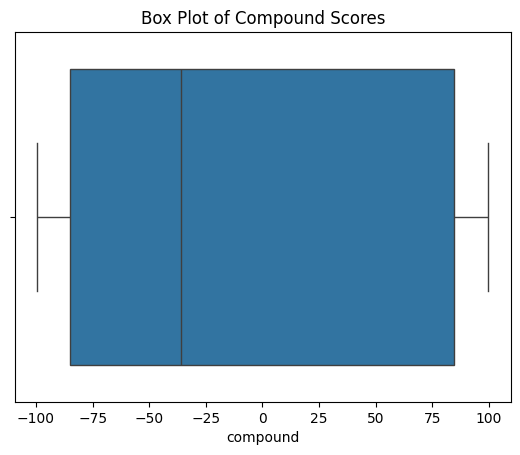

In [89]:
# Create a box plot
sns.boxplot(x=polarity_and_vader['compound'])
plt.title('Box Plot of Compound Scores')
plt.show()

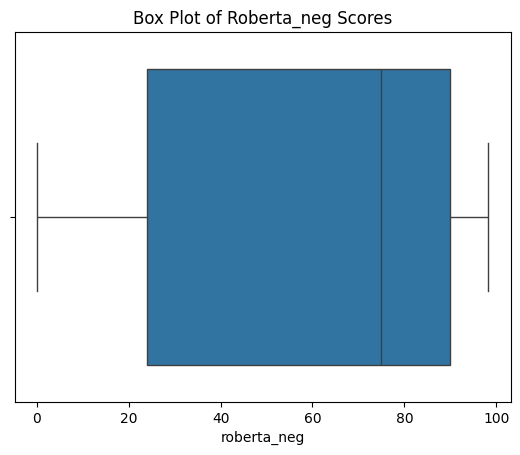

In [90]:
# Create a box plot
sns.boxplot(x=polarity_and_vader['roberta_neg'])
plt.title('Box Plot of Roberta_neg Scores')
plt.show()

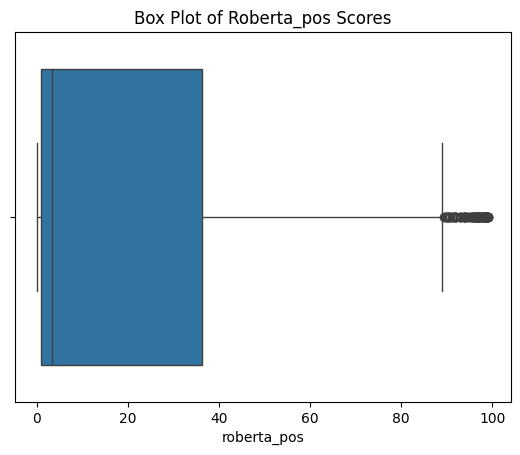

In [91]:
# Create a box plot
sns.boxplot(x=polarity_and_vader['roberta_pos'])
plt.title('Box Plot of Roberta_pos Scores')
plt.show()

In [92]:
#Creating a New Column based on Compound col <0 >0
polarity_and_vader['Vader_analysis'] = polarity_and_vader['compound'].apply(lambda x: 'Negative' if x < 0 else 'Positive' if x > 0.25 else 'Neutral')
polarity_and_vader.head()


index  roberta_neg  roberta_neu  roberta_pos   neg   neu   pos  compound  \
0      2    96.449997         3.19         0.35  23.0  64.9  12.1    -59.94   
1      6    87.459999        11.27         1.28   8.7  83.1   8.1     43.68   
2      7    86.559998        12.22         1.22   6.6  93.4   0.0    -73.91   
3      9    92.389999         6.92         0.69  14.4  78.4   7.2    -68.20   
4     12    91.940002         7.33         0.73   5.4  90.7   3.9    -60.59   

   Cabin Staff Service                Date  ... cabin_flown  date_flown  \
0                  2.0   7th February 2025  ...           4  2024-12-01   
1                  2.0   15th January 2025  ...           4  2024-11-01   
2                  1.0    9th January 2025  ...           3  2024-12-01   
3                  2.0    4th January 2025  ...           4  2023-11-01   
4                  1.0  17th December 2024  ...           4  2024-11-01   

   recommended                            route type_of_traveller  year month  \
0            0                 Zürich to London                 2  2024    12   
1            0        Manchester to Isle of Man                 1  2024    11   
2            0    Houston to cologne via London                 4  2024    12   
3            0                London to Phoenix                 4  2023    11   
4            0  Larnaca to Glasgow via Heathrow                 4  2024    11   

   Verified  word_count Vader_analysis  
0         1          36       Negative  
1         1         102       Positive  
2         1         109       Negative  
3         1          70       Negative  
4         1         279       Negative  

[5 rows x 30 columns]

In [93]:
polarity_and_vader['Vader_analysis'].value_counts()

Vader_analysis
Negative    354
Positive    280
Neutral       3
Name: count, dtype: int64

In [94]:
#Creating a New Column based on Compound col <0 >0
# polarity_and_vader['Roberta_analysis'] = polarity_and_vader.apply(lambda x: 'Positive' if x['roberta_pos'] > 0.50 else 'Negative' if x['roberta_neg'] > 0.50 else 'Neutral', axis=1)
polarity_and_vader['Roberta_analysis'] = polarity_and_vader.apply(lambda x: 'Positive' if (x['roberta_pos'] > 0.2) & (x['roberta_pos'] > x['roberta_neg']) else
              'Negative' if (x['roberta_neg'] > 0.2) & (x['roberta_neg'] > x['roberta_pos']) else 'Neutral',  axis=1)
polarity_and_vader.head()


index  roberta_neg  roberta_neu  roberta_pos   neg   neu   pos  compound  \
0      2    96.449997         3.19         0.35  23.0  64.9  12.1    -59.94   
1      6    87.459999        11.27         1.28   8.7  83.1   8.1     43.68   
2      7    86.559998        12.22         1.22   6.6  93.4   0.0    -73.91   
3      9    92.389999         6.92         0.69  14.4  78.4   7.2    -68.20   
4     12    91.940002         7.33         0.73   5.4  90.7   3.9    -60.59   

   Cabin Staff Service                Date  ... date_flown  recommended  \
0                  2.0   7th February 2025  ... 2024-12-01            0   
1                  2.0   15th January 2025  ... 2024-11-01            0   
2                  1.0    9th January 2025  ... 2024-12-01            0   
3                  2.0    4th January 2025  ... 2023-11-01            0   
4                  1.0  17th December 2024  ... 2024-11-01            0   

                             route  type_of_traveller  year  month Verified  \
0                 Zürich to London                  2  2024     12        1   
1        Manchester to Isle of Man                  1  2024     11        1   
2    Houston to cologne via London                  4  2024     12        1   
3                London to Phoenix                  4  2023     11        1   
4  Larnaca to Glasgow via Heathrow                  4  2024     11        1   

   word_count  Vader_analysis Roberta_analysis  
0          36        Negative         Negative  
1         102        Positive         Negative  
2         109        Negative         Negative  
3          70        Negative         Negative  
4         279        Negative         Negative  

[5 rows x 31 columns]

In [95]:
# polarity_and_vader[polarity_and_vader['Roberta_analysis'] == 'Negative']
polarity_and_vader['Roberta_analysis'].value_counts()

Roberta_analysis
Negative    473
Positive    164
Name: count, dtype: int64

In [96]:
polarity_and_vader.groupby(['year','Vader_analysis']).size()

year  Vader_analysis
2022  Negative          109
      Neutral             1
      Positive          103
2023  Negative          156
      Neutral             2
      Positive          108
2024  Negative           89
      Positive           69
dtype: int64

In [97]:
polarity_and_vader[polarity_and_vader['Roberta_analysis'] == 'Neutral']

Empty DataFrame
Columns: [index, roberta_neg, roberta_neu, roberta_pos, neg, neu, pos, compound, Cabin Staff Service, Date, Feedback, Food & Beverages, Ground Service, Inflight Entertainment, Name, Seat Comfort, Title, Value For Money, Wifi & Connectivity, aircraft, cabin_flown, date_flown, recommended, route, type_of_traveller, year, month, Verified, word_count, Vader_analysis, Roberta_analysis]
Index: []

[0 rows x 31 columns]

In [98]:
Filtered_df = polarity_and_vader[polarity_and_vader['Roberta_analysis']  != polarity_and_vader['Vader_analysis']]
Filtered_df.head()

index  roberta_neg  roberta_neu  roberta_pos   neg   neu   pos  compound  \
1       6    87.459999    11.270000     1.280000   8.7  83.1   8.1     43.68   
14     22    18.990000    39.020000    41.980000  11.9  81.4   6.6    -66.63   
17     26    68.889999    28.760000     2.350000   0.0  99.1   0.9      2.58   
27     37    44.959999    34.660000    20.379999   5.9  84.5   9.6     81.41   
32     42    34.349998    43.630001    22.020000   6.2  79.3  14.5     97.70   

    Cabin Staff Service                Date  ... date_flown  recommended  \
1                   2.0   15th January 2025  ... 2024-11-01            0   
14                  2.0  17th November 2024  ... 2024-11-01            0   
17                  2.0   8th November 2024  ... 2024-10-01            0   
27                  2.0   31st October 2024  ... 2024-10-01            0   
32                  5.0   12th October 2024  ... 2024-10-01            1   

                                    route  type_of_traveller  year  month  \
1               Manchester to Isle of Man                  1  2024     11   
14                      London to Belfast                  4  2024     11   
17       Singapore to Keflavik via London                  2  2024     10   
27  San Francisco to Barcelona via London                  2  2024     10   
32                  London to Mexico City                  3  2024     10   

   Verified  word_count  Vader_analysis Roberta_analysis  
1         1         102        Positive         Negative  
14        1          98        Negative         Positive  
17        1         135        Positive         Negative  
27        1         169        Positive         Negative  
32        1         256        Positive         Negative  

[5 rows x 31 columns]

In [99]:
Filtered_df['Feedback'].iloc[0]

'   I booked through BA because Loganair don’t have representatives in Manchester airport. Loganair cancelled the flight but someone at BA marked the flight as delayed by 52 minutes. I’ve spent over 70 days chasing BA’s complaints department who are at best totally ineffective. They won’t put you through to the people dealing with the claim (apparently they don’t have the facility to do so!), they won’t phone Loganair, they won’t look on Manchester airports historic flight website to confirm the cancellation, they won’t put you through to a supervisor in fact they do very little but apologise for how little they do.'

###It is Evident that Roberta Model is much more accurate in our sentiment analysis so will be avoiding the Vader.

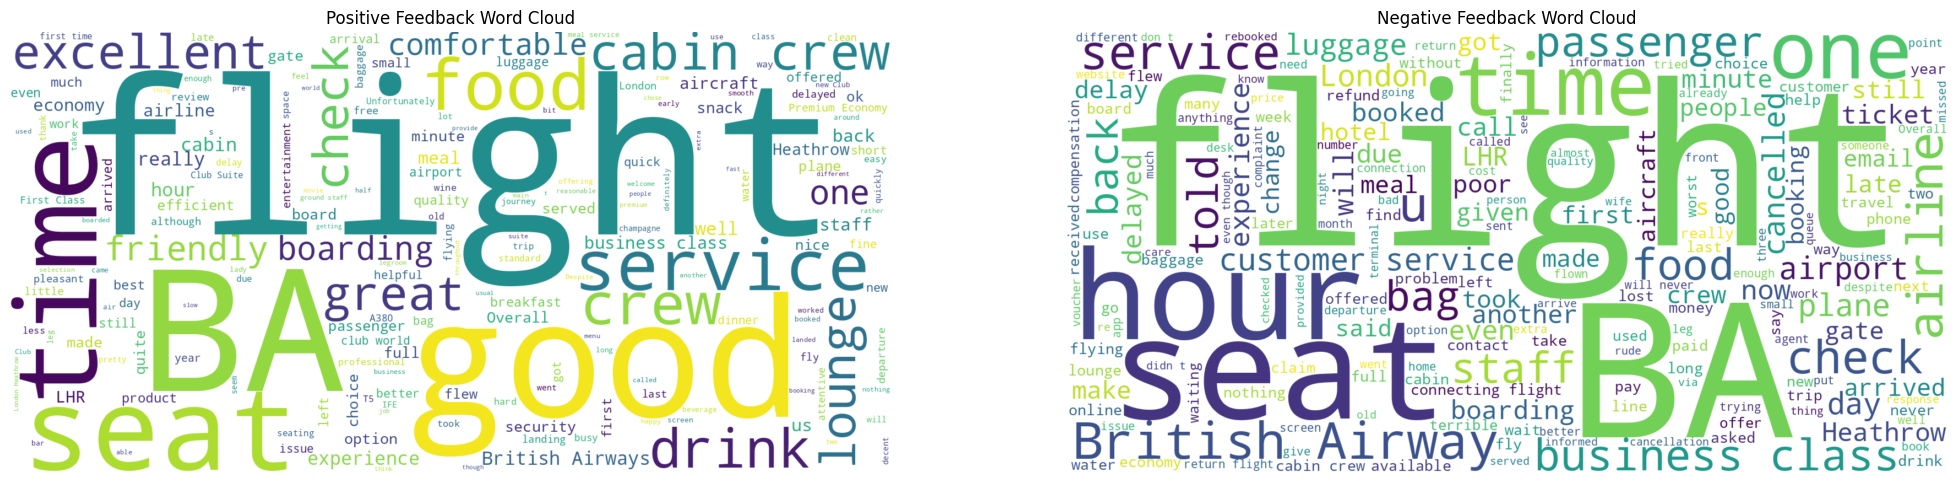

In [100]:
from wordcloud import WordCloud, STOPWORDS

# Filter positive and negative feedback
positive_feedback = polarity_and_vader[polarity_and_vader['Roberta_analysis'] == 'Positive']['Feedback']
negative_feedback = polarity_and_vader[polarity_and_vader['Roberta_analysis'] == 'Negative']['Feedback']

# Combine all feedback into one text
positive_text = ' '.join(positive_feedback)
negative_text = ' '.join(negative_feedback)

# Generate Word Cloud for Positive Feedback
positive_wc = WordCloud(width=1600, height=800, background_color='white').generate(positive_text)

# Generate Word Cloud for Negative Feedback
negative_wc = WordCloud(width=1600, height=800, background_color='white').generate(negative_text)

# Plot the Word Clouds
plt.figure(figsize=(25, 25))

# Positive Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Positive Feedback Word Cloud')
plt.axis('off')

# Negative Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Negative Feedback Word Cloud')
plt.axis('off')

plt.show()

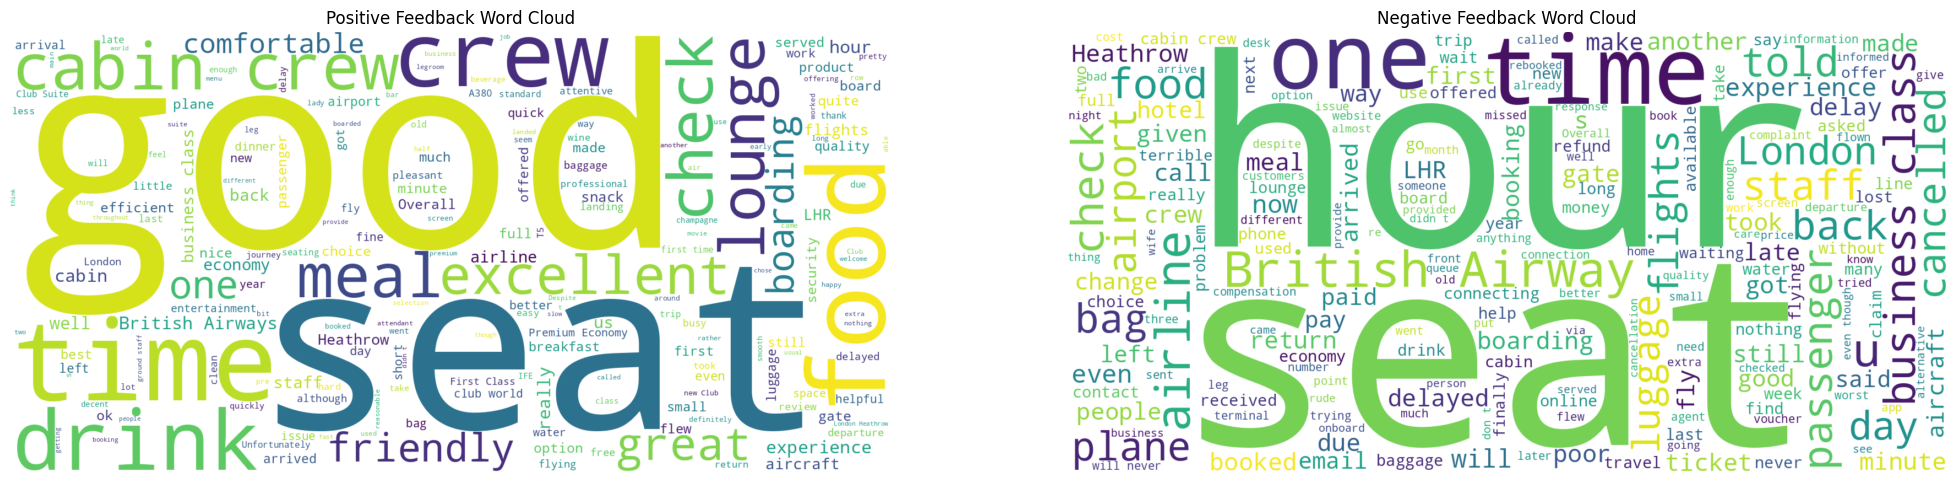

In [101]:
# Define custom stopwords (you can expand this list based on your data)
custom_stopwords = set(STOPWORDS).union({"flight", "customer", "service", "support", "the", "was", "is", "a", "ba","to", "and"})

# Filter positive and negative feedback
positive_feedback = polarity_and_vader[polarity_and_vader['Roberta_analysis'] == 'Positive']['Feedback']
negative_feedback = polarity_and_vader[polarity_and_vader['Roberta_analysis'] == 'Negative']['Feedback']

# Combine all feedback into one text
positive_text = ' '.join(positive_feedback)
negative_text = ' '.join(negative_feedback)

# Generate Word Cloud for Positive Feedback
positive_wc = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    stopwords=custom_stopwords  # Remove custom stopwords
).generate(positive_text)

# Generate Word Cloud for Negative Feedback
negative_wc = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    stopwords=custom_stopwords  # Remove custom stopwords
).generate(negative_text)

# Plot the Word Clouds
plt.figure(figsize=(25, 25))

# Positive Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Positive Feedback Word Cloud')
plt.axis('off')

# Negative Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Negative Feedback Word Cloud')
plt.axis('off')

plt.show()

In [102]:
polarity_and_vader.iloc[0]
# .isin(['float32','float64', 'int64'])

index                                                                     2
roberta_neg                                                       96.449997
roberta_neu                                                            3.19
roberta_pos                                                            0.35
neg                                                                    23.0
neu                                                                    64.9
pos                                                                    12.1
compound                                                             -59.94
Cabin Staff Service                                                     2.0
Date                                                      7th February 2025
Feedback                   Terrible overall, medium service and the flig...
Food & Beverages                                                        1.0
Ground Service                                                          1.0
Inflight Entertainment                                                  1.0
Name                                                               L Martin
Seat Comfort                                                            2.0
Title                                       “customer support was terrible”
Value For Money                                                           1
Wifi & Connectivity                                                     4.0
aircraft                                                               None
cabin_flown                                                               4
date_flown                                              2024-12-01 00:00:00
recommended                                                               0
route                                                      Zürich to London
type_of_traveller                                                         2
year                                                                   2024
month                                                                    12
Verified                                                                  1
word_count                                                               36
Vader_analysis                                                     Negative
Roberta_analysis                                                   Negative
Name: 0, dtype: object

In [103]:
# check by year how many were positive and negative reviews as per Roberta
polarity_and_vader.groupby(['year','Roberta_analysis']).size()

year  Roberta_analysis
2022  Negative            150
      Positive             63
2023  Negative            205
      Positive             61
2024  Negative            118
      Positive             40
dtype: int64

In [104]:
polarity_and_vader['Roberta_analysis'].value_counts()

Roberta_analysis
Negative    473
Positive    164
Name: count, dtype: int64

In [105]:
polarity_and_vader['Roberta_analysis'].replace({'Positive': 1, 'Negative': 0}, inplace=True)

<ipython-input-105-e1762c8c4684>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  polarity_and_vader['Roberta_analysis'].replace({'Positive': 1, 'Negative': 0}, inplace=True)
<ipython-input-105-e1762c8c4684>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  polarity_and_vader['Roberta_analysis'].repl

In [106]:
model_data = polarity_and_vader.copy()
model_data.head()

index  roberta_neg  roberta_neu  roberta_pos   neg   neu   pos  compound  \
0      2    96.449997         3.19         0.35  23.0  64.9  12.1    -59.94   
1      6    87.459999        11.27         1.28   8.7  83.1   8.1     43.68   
2      7    86.559998        12.22         1.22   6.6  93.4   0.0    -73.91   
3      9    92.389999         6.92         0.69  14.4  78.4   7.2    -68.20   
4     12    91.940002         7.33         0.73   5.4  90.7   3.9    -60.59   

   Cabin Staff Service                Date  ... date_flown  recommended  \
0                  2.0   7th February 2025  ... 2024-12-01            0   
1                  2.0   15th January 2025  ... 2024-11-01            0   
2                  1.0    9th January 2025  ... 2024-12-01            0   
3                  2.0    4th January 2025  ... 2023-11-01            0   
4                  1.0  17th December 2024  ... 2024-11-01            0   

                             route  type_of_traveller  year  month Verified  \
0                 Zürich to London                  2  2024     12        1   
1        Manchester to Isle of Man                  1  2024     11        1   
2    Houston to cologne via London                  4  2024     12        1   
3                London to Phoenix                  4  2023     11        1   
4  Larnaca to Glasgow via Heathrow                  4  2024     11        1   

   word_count  Vader_analysis Roberta_analysis  
0          36        Negative                0  
1         102        Positive                0  
2         109        Negative                0  
3          70        Negative                0  
4         279        Negative                0  

[5 rows x 31 columns]

In [107]:
#need to drop object columns
model_data = model_data[model_data.dtypes[model_data.dtypes != 'object'].index]
model_data.head()

index  roberta_neg  roberta_neu  roberta_pos   neg   neu   pos  compound  \
0      2    96.449997         3.19         0.35  23.0  64.9  12.1    -59.94   
1      6    87.459999        11.27         1.28   8.7  83.1   8.1     43.68   
2      7    86.559998        12.22         1.22   6.6  93.4   0.0    -73.91   
3      9    92.389999         6.92         0.69  14.4  78.4   7.2    -68.20   
4     12    91.940002         7.33         0.73   5.4  90.7   3.9    -60.59   

   Cabin Staff Service  Food & Beverages  ...  Wifi & Connectivity  \
0                  2.0               1.0  ...                  4.0   
1                  2.0               1.0  ...                  4.0   
2                  1.0               2.0  ...                  4.0   
3                  2.0               2.0  ...                  4.0   
4                  1.0               1.0  ...                  4.0   

   cabin_flown  date_flown  recommended  type_of_traveller  year month  \
0            4  2024-12-01            0                  2  2024    12   
1            4  2024-11-01            0                  1  2024    11   
2            3  2024-12-01            0                  4  2024    12   
3            4  2023-11-01            0                  4  2023    11   
4            4  2024-11-01            0                  4  2024    11   

   Verified  word_count  Roberta_analysis  
0         1          36                 0  
1         1         102                 0  
2         1         109                 0  
3         1          70                 0  
4         1         279                 0  

[5 rows x 24 columns]

In [123]:
model_data.describe()

Cabin Staff Service  Food & Beverages  Ground Service  \
count           637.000000        637.000000      637.000000   
mean              3.001570          2.499215        2.326531   
std               1.479949          1.366289        1.466653   
min               1.000000          1.000000        1.000000   
25%               2.000000          1.000000        1.000000   
50%               3.000000          2.000000        2.000000   
75%               4.000000          4.000000        4.000000   
max               5.000000          5.000000        5.000000   

       Inflight Entertainment  Seat Comfort  Value For Money  \
count              637.000000    637.000000       637.000000   
mean                 2.654631      2.618524         2.166405   
std                  1.260190      1.326022         1.382938   
min                  1.000000      1.000000         1.000000   
25%                  2.000000      1.000000         1.000000   
50%                  3.000000      3.000000         2.000000   
75%                  4.000000      4.000000         3.000000   
max                  5.000000      5.000000         5.000000   

       Wifi & Connectivity  cabin_flown  recommended  type_of_traveller  \
count           637.000000   637.000000   637.000000         637.000000   
mean              2.200942     3.174254     0.274725           2.180534   
std               1.315294     0.971009     0.446727           1.058240   
min               1.000000     1.000000     0.000000           1.000000   
25%               1.000000     2.000000     0.000000           1.000000   
50%               2.000000     4.000000     0.000000           2.000000   
75%               3.000000     4.000000     1.000000           3.000000   
max               5.000000     4.000000     1.000000           5.000000   

            month    Verified  Roberta_analysis  
count  637.000000  637.000000        637.000000  
mean     6.361068    0.715856          0.257457  
std      3.321115    0.451360          0.437577  
min      1.000000    0.000000          0.000000  
25%      3.000000    0.000000          0.000000  
50%      6.000000    1.000000          0.000000  
75%      9.000000    1.000000          1.000000  
max     12.000000    1.000000          1.000000

In [108]:
#drop columns like ['Date', 'year','neg','neu','pos','compound','date_flown','word_count']
model_data.drop(columns=['index','roberta_neg','roberta_neu','roberta_pos','year','neg','neu','pos','compound','date_flown','word_count'],axis=1,inplace=True)
model_data.head()

Cabin Staff Service  Food & Beverages  Ground Service  \
0                  2.0               1.0             1.0   
1                  2.0               1.0             1.0   
2                  1.0               2.0             1.0   
3                  2.0               2.0             1.0   
4                  1.0               1.0             1.0   

   Inflight Entertainment  Seat Comfort  Value For Money  Wifi & Connectivity  \
0                     1.0           2.0                1                  4.0   
1                     1.0           2.0                1                  4.0   
2                     2.0           1.0                1                  4.0   
3                     2.0           2.0                1                  4.0   
4                     2.0           1.0                1                  4.0   

   cabin_flown  recommended  type_of_traveller  month  Verified  \
0            4            0                  2     12         1   
1            4            0                  1     11         1   
2            3            0                  4     12         1   
3            4            0                  4     11         1   
4            4            0                  4     11         1   

   Roberta_analysis  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [109]:
#Storing it in file for Model usage
model_data.to_csv('model_data.csv',index=False)

In [110]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cabin Staff Service     637 non-null    float64
 1   Food & Beverages        637 non-null    float64
 2   Ground Service          637 non-null    float64
 3   Inflight Entertainment  637 non-null    float64
 4   Seat Comfort            637 non-null    float64
 5   Value For Money         637 non-null    int64  
 6   Wifi & Connectivity     637 non-null    float64
 7   cabin_flown             637 non-null    int64  
 8   recommended             637 non-null    int64  
 9   type_of_traveller       637 non-null    int64  
 10  month                   637 non-null    int32  
 11  Verified                637 non-null    int64  
 12  Roberta_analysis        637 non-null    int64  
dtypes: float64(6), int32(1), int64(6)
memory usage: 62.3 KB


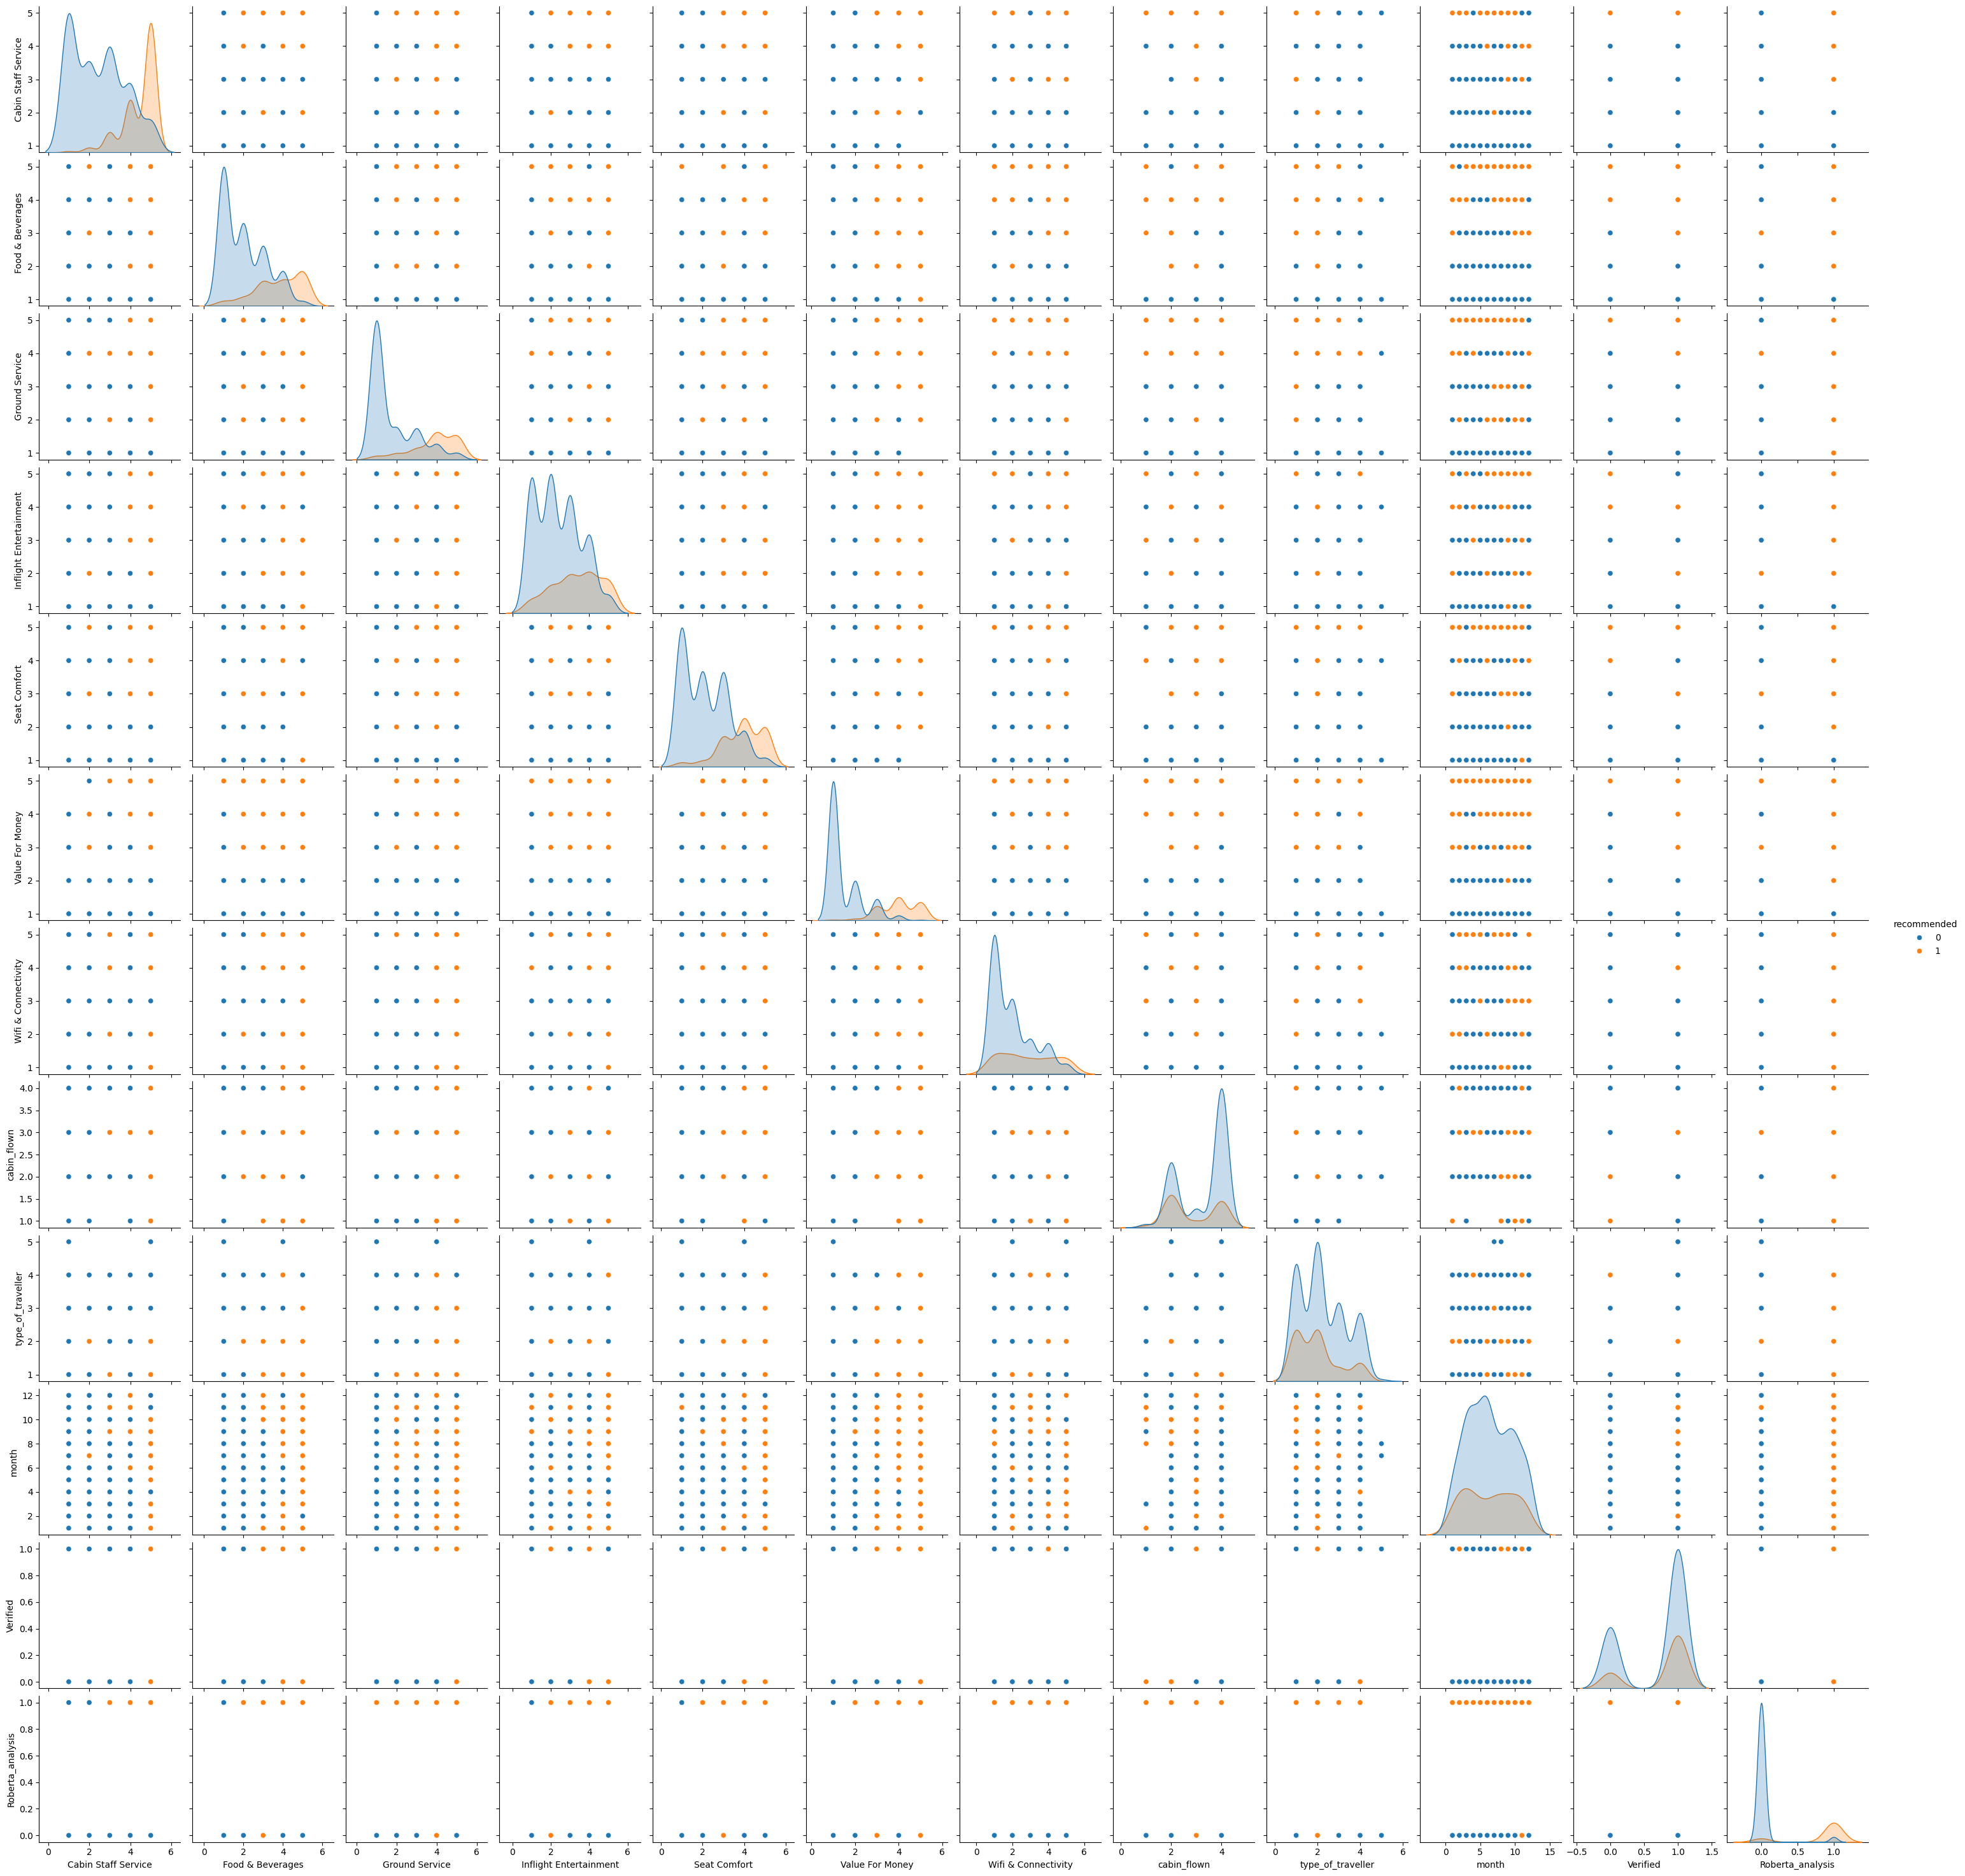

In [111]:
sns.pairplot(model_data,hue='recommended')

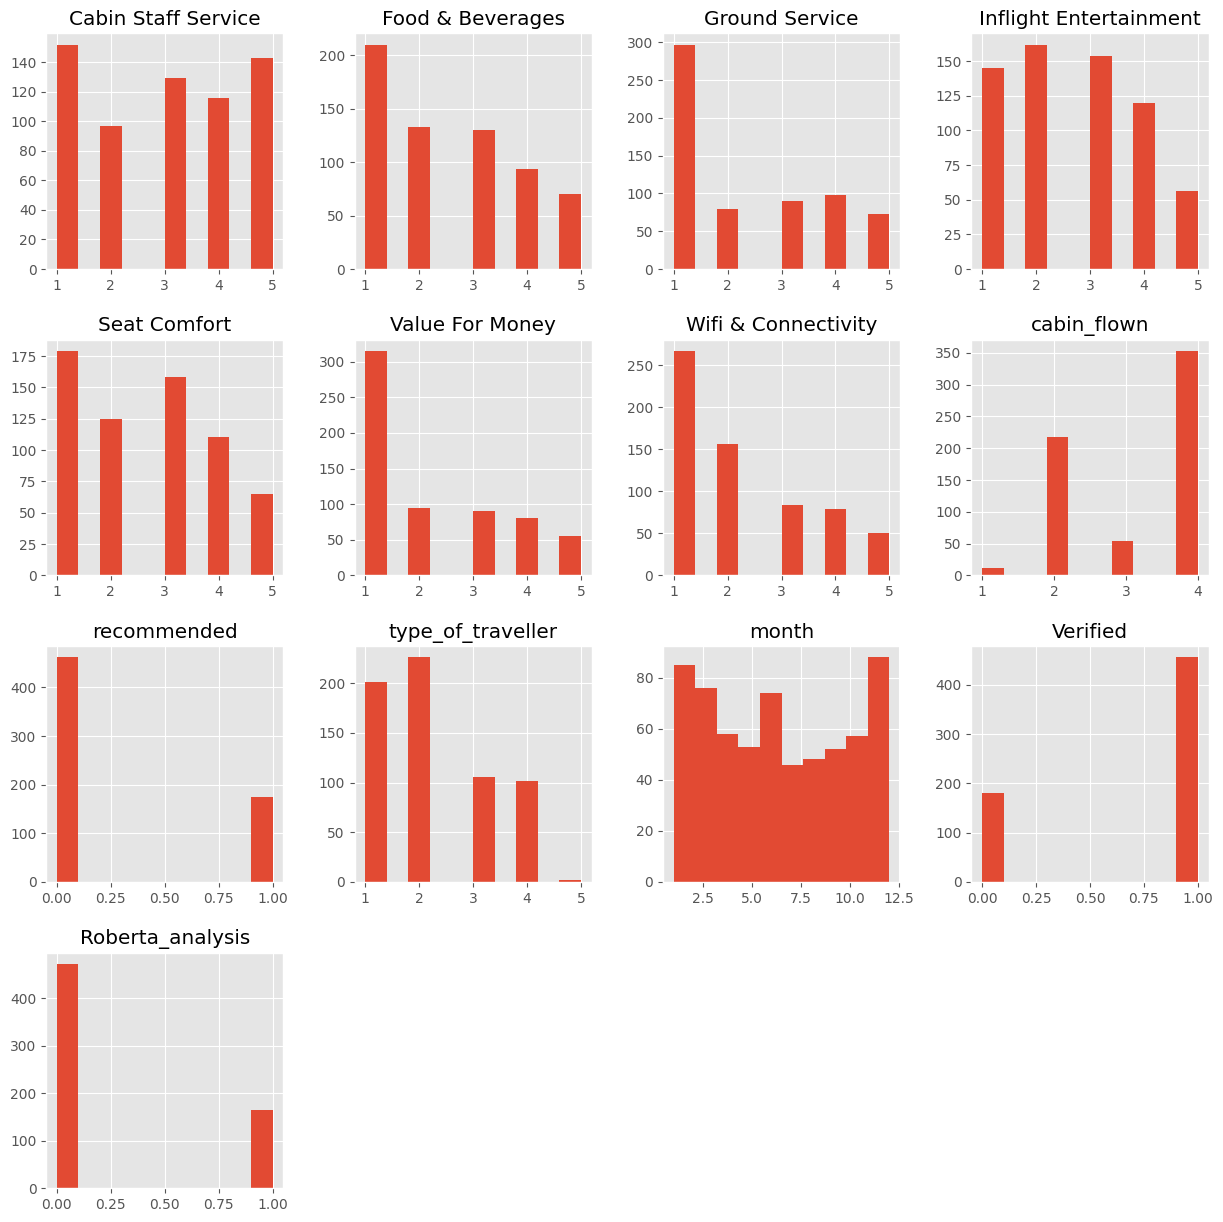

In [112]:
plt.style.use('ggplot')
model_data.hist(figsize=(15,15))
plt.show()

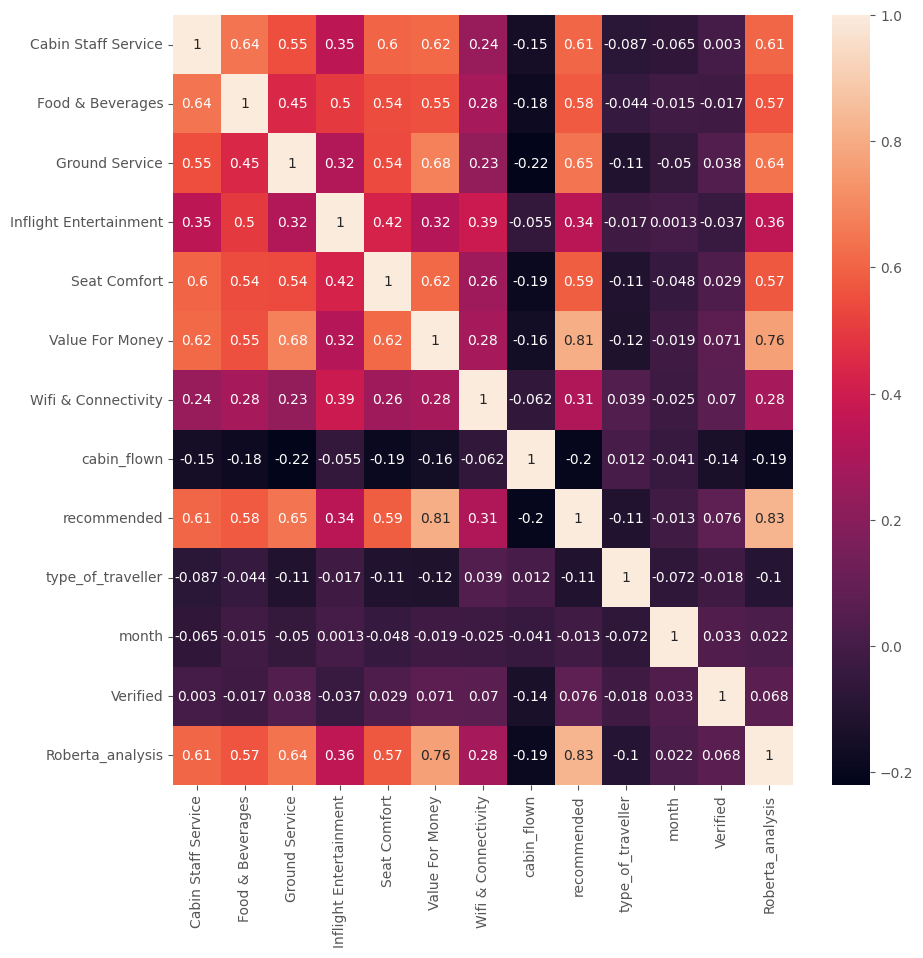

In [127]:
#plot a big corr heatmap
plt.figure(figsize=(10,10))
sns.heatmap(model_data.corr(),annot=True)
plt.show()

As you can see, we don't need to perform feature selection

## Feature Scaling Or Standardization


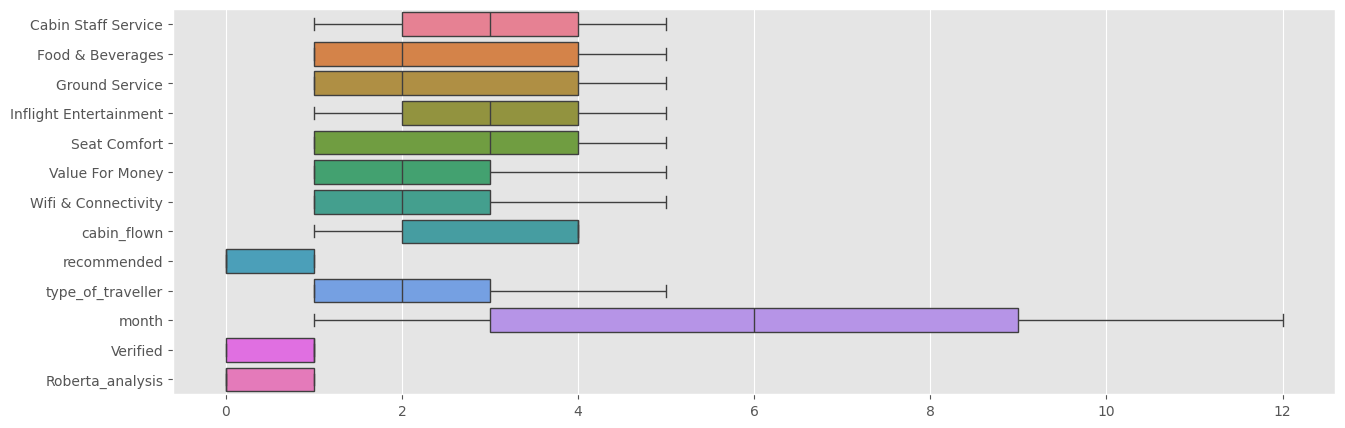

In [114]:
plt.subplots(figsize=(15,5,))
sns.boxplot(data=model_data,orient='h')
plt.show()

In [115]:
#Need to split my data into train and test
from sklearn.model_selection import train_test_split
X = model_data.drop('recommended',axis=1)
y = model_data['recommended']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [117]:
# plt.subplot(1,2,1)
# sns.boxplot(data=X_train,orient='h')
# plt.title("Before Scaling")
# plt.subplot(1,2,2)
# sns.boxplot(data=X_train_scaled,orient='h')
# plt.title('After Scaling')
# plt.show()


Linear Regression Model

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
Lin_reg = LinearRegression()
Lin_reg.fit(X_train_scaled,y_train)
y_pred = Lin_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.037802627340187876
R-squared: 0.8150555999643416


Ridge Regression

In [119]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train_scaled,y_train)
y_pred = ridge_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.037810906470964495
R-squared: 0.8150150954020392
